In [1]:
# Importing important libraries :
import numpy as np
import pandas as pd
import time

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
'''
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
'''
# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

In [4]:
# load the data from source file in to Dataframe
df_credit = pd.read_csv('creditcard.csv')
df_credit.head(10)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
5  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   
6  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055  0.750137   
7 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
8  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592  0.373205   
9  0.069539 -0.736727  ... -0.246914 -0.633753 -0.120794 -0.385050 -0.069733   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  
5  0.105915  0.253844  0.081080    3.67      0  
6 -0.257237  0.034507  0.005168    4.99      0  
7 -0.051634 -1.206921 -1.085339   40.80      0  
8 -0.384157  0.011747  0.142404   93.20      0  
9  0.094199  0.246219  0.083076    3.68      0  

[10 rows x 31 columns]

In [6]:
# finding the null values in the data
# if False then no null values and if True the null values are available in the data
df_credit.isnull().sum().any()

False

In [8]:
# verifying if the rows and columns imported
df_credit.shape

(284807, 31)

In [10]:
# description of the data in the DataFrame
## it gives the statistical parameter for all the columns
## 25% is first Quartile (Q1) and 75% is the third Quartile (Q3)
## InterQuartileRange IQR = Q3-Q1
## Higher is the IQR means more spread is available in the data (outliers are in right tail)
df_credit.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [ ]:
## in the above description, in Amount column Mean is greater than Median (50%) (88.349619 > 22.000000)
## which means that the data is right skewed ie., it will have a long right tail

In [12]:
# Columns and their datatypes
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
# Checking the value count for "Class" Column
# to determine fraud related records
df_credit['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [14]:
# finding the fraud average % values of class
(df_credit.groupby('Class')['Class'].count()/df_credit['Class'].count()) *100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

In [16]:
# Finding the correlation of each column in the Dataframe with correlation matrix
## currently by default 'Pearson' method for linear relationship is used
creditcor = df_credit.corr()
creditcor

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.124348  2.053457e-16 -9.568710e-17  6.310231e-16 -5.625518e-16   
V13    -0.065902 -2.425603e-17  6.295388e-16  2.807652e-16  1.303306e-16   
V14    -0.098757 -5.020280e-16 -1.730566e-16  4.739859e-16  2.282280e-16   
V15    -0.183453  3.547782e-16 -4.995814e-17  9.068793e-16  1.377649e-16   
V16     0.011903  7.212815e-17  1.177316e-17  8.299445e-16 -9.614528e-16   
V17    -0.073297 -3.879840e-16 -2.685296e-16  7.614712e-16 -2.699612e-16   
V18     0.090438  3.230206e-17  3.284605e-16  1.509897e-16 -5.103644e-16   
V19     0.028975  1.502024e-16 -7.118719e-18  3.463522e-16 -3.980557e-16   
V20    -0.050866  4.654551e-16  2.506675e-16 -9.316409e-16 -1.857247e-16   
V21     0.044736 -2.457409e-16 -8.480447e-17  5.706192e-17 -1.949553e-16   
V22     0.144059 -4.290944e-16  1.526333e-16 -1.133902e-15 -6.276051e-17   
V23     0.051142  6.168652e-16  1.634231e-16 -4.983035e-16  9.164206e-17   
V24    -0.016182 -4.425156e-17  1.247925e-17  2.686834e-19  1.584638e-16   
V25    -0.233083 -9.605737e-16 -4.478846e-16 -1.104734e-15  6.070716e-16   
V26    -0.041407 -1.581290e-17  2.057310e-16 -1.238062e-16 -4.247268e-16   
V27    -0.005135  1.198124e-16 -4.966953e-16  1.045747e-15  3.977061e-17   
V28    -0.009413  2.083082e-15 -5.093836e-16  9.775546e-16 -2.761403e-18   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1      1.812612e-17 -6.506567e-16 -1.005191e-15 -2.433822e-16 -1.513678e-16   
V2      5.157519e-16  2.787346e-16  2.055934e-16 -5.377041e-17  1.978488e-17   
V3     -6.539009e-17  1.627627e-15  4.895305e-16 -1.268779e-15  5.568367e-16   
V4     -1.719944e-15 -7.491959e-16 -4.104503e-16  5.697192e-16  6.923247e-16   
V5      1.000000e+00  2.408382e-16  2.715541e-16  7.437229e-16  7.391702e-16   
V6      2.408382e-16  1.000000e+00  1.191668e-16 -1.104219e-16  4.131207e-16   
V7      2.715541e-16  1.191668e-16  1.000000e+00  3.344412e-16  1.122501e-15   
V8      7.437229e-16 -1.104219e-16  3.344412e-16  1.000000e+00  4.356078e-16   
V9      7.391702e-16  4.131207e-16  1.122501e-15  4.356078e-16  1.000000e+00   
V10    -5.202306e-16  5.932243e-17 -7.492834e-17 -2.801370e-16 -4.642274e-16   
V11     7.203963e-16  1.980503e-15  1.425248e-16  2.487043e-16  1.354680e-16   
V12     7.412552e-16  2.375468e-16 -3.536655e-18  1.839891e-16 -1.079314e-15   
V13     5.886991e-16 -1.211182e-16  1.266462e-17 -2.921856e-16  2.251072e-15   
V14     6.565143e-16  2.621312e-16  2.607772e-16 -8.599156e-16  3.784757e-15   
V15    -8.720275e-16 -1.531188e-15 -1.690540e-16  4.127777e-16 -1.051167e-15   
V16     2.246261e-15  2.623672e-18  5.869302e-17 -5.254741e-16 -1.214086e-15   
V17     1.281914e-16  2.015618e-16  2.177192e-16 -2.269549e-16  1.113695e-15   
V18     5.308590e-16  1.223814e-16  7.604126e-17 -3.667974e

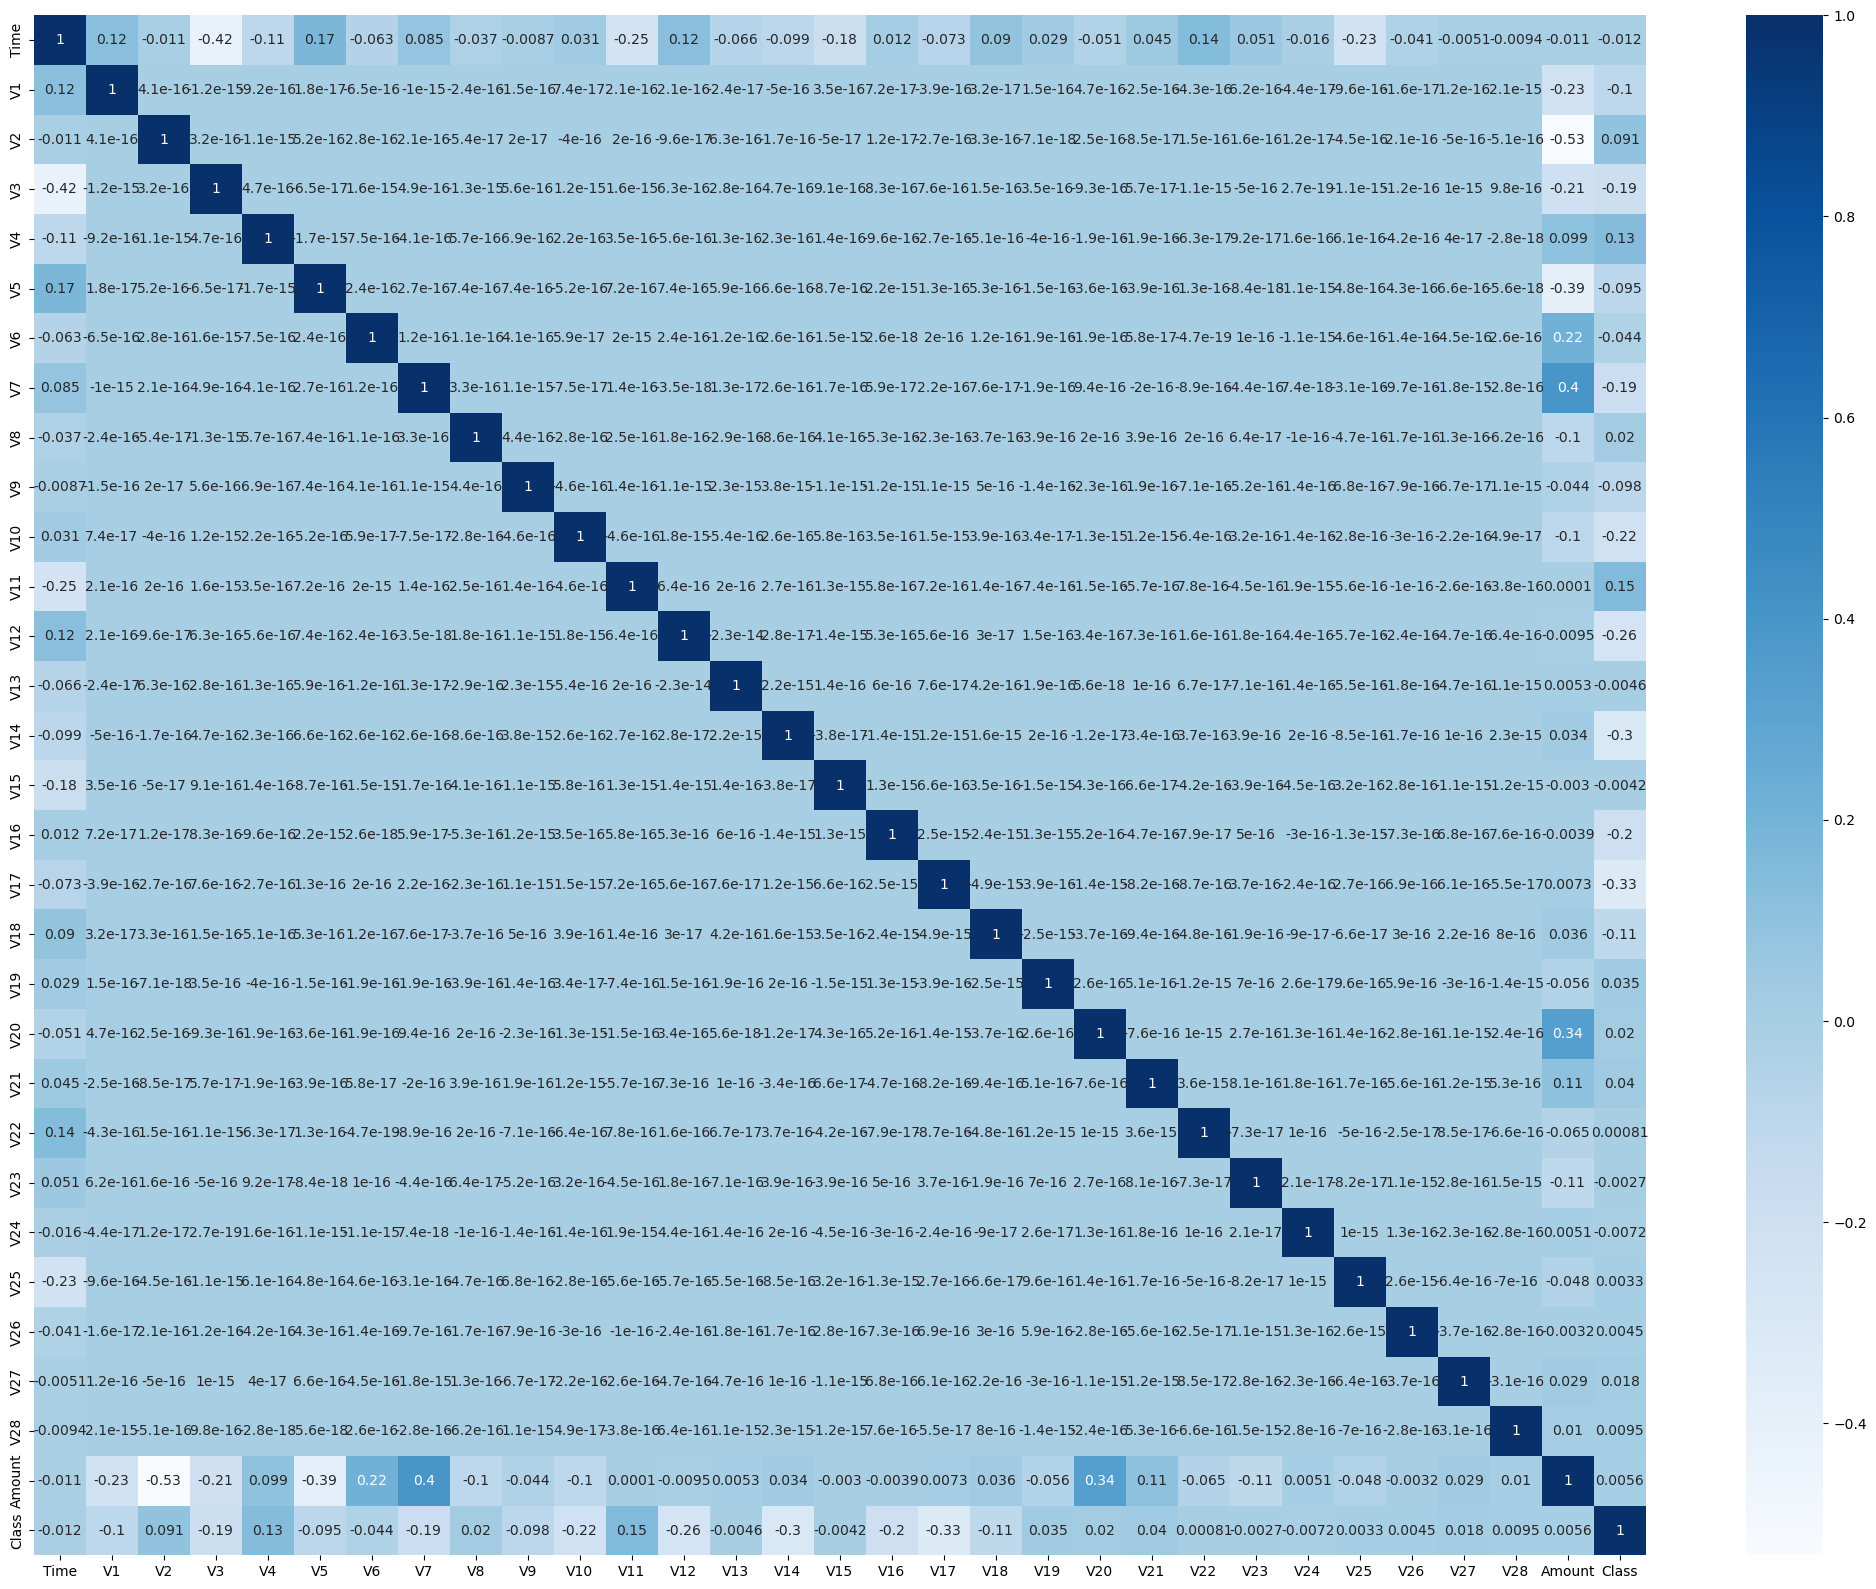

In [18]:
# plotting correlations on a heatmap to visualy identify relationships and patterns
# Setting figure size
plt.figure(figsize=(26,20))

# heatmap
sns.heatmap(creditcor, cmap="Blues", annot=True)
plt.show()

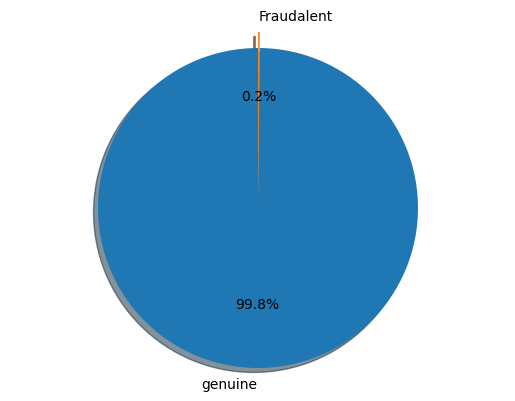

genuine Share % is : 99.83
Fradulent Share % is : 0.17


In [21]:
# Creating Pie chart for Fraudalent vs Genuine distribution in Percentages')
classes=df_credit['Class'].value_counts()
genuine_share=classes[0]/df_credit['Class'].count()*100
fraud_share=classes[1]/df_credit['Class'].count()*100

labels = 'genuine', 'Fraudalent'
sizes = [genuine_share, fraud_share]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
print('genuine Share % is :',round(genuine_share,2))
print('Fradulent Share % is :',round(fraud_share,2))

In [ ]:
'''
The Binary Target variable distribution shows a highly imbalanced dataset
Class[0] Target Variable (genuine) with 99.83% significantly outnumbers Class[1] Target Variable (Fradulent) with 0.17%
this will create a bias in model prediction resulting in high accuracy for majority class[0]
The genuinity is very high
'''


In [43]:
# we will plot the distribution of classes with time using scatter plot
## this will help in observing the distribution accross different aspects of time
## we will use Timedelta from pandas to represent the relative time to durations

## convert the given time column to from realative seconds to duration seconds
## Ex: from 0.1 seconds to 0 days 00:00:00.100000
Delta_Time = pd.to_timedelta(df_credit['Time'], unit='s')

# using above Delta_time conversion we will derive Days, Hours and Minutes column 
df_credit['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df_credit['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df_credit['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

KeyError: 'Time'

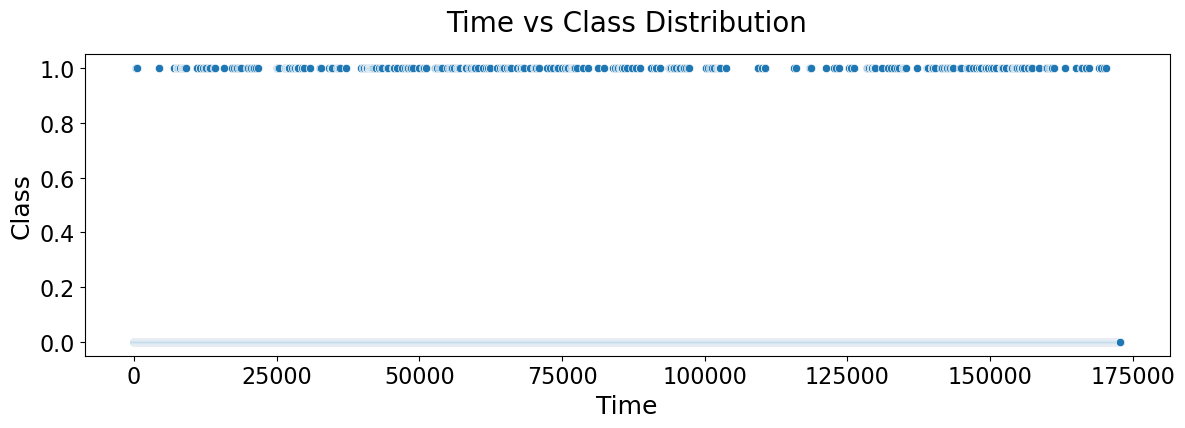

In [21]:
# we will try to understand the relationship between the two variables
## Bivariate Analysis for Class[0] and Class[1]
# Using ScatterPlot chart

fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('deep')

# PLottiing the relation between Class[0] and Class[1] with time in Secs
plt.subplot(4,1,1)
sns.scatterplot(x=df_credit['Time'], y='Class', palette=cmap, data=df_credit)
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Time vs Class Distribution', size=20, y=1.05)
plt.show()

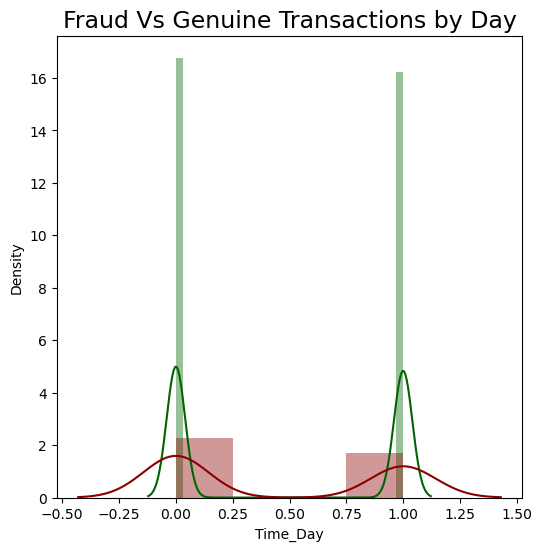

In [27]:
#The fraudulant Class[1] Vs genuine Class[0] trasaction by day frequency
plt.figure(figsize=(6,6))
sns.distplot(df_credit[df_credit['Class'] == 0]["Time_Day"], color='darkgreen')
sns.distplot(df_credit[df_credit['Class'] == 1]["Time_Day"], color='darkred')
plt.title('Fraud Vs Genuine Transactions by Day', fontsize=17)
plt.show()

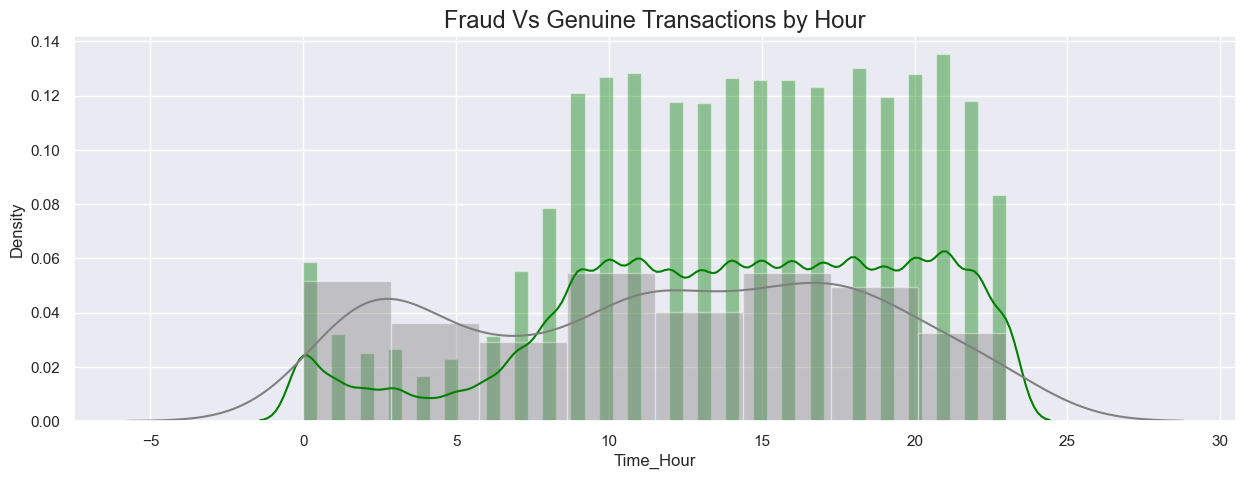

In [38]:
#The fraus Vs genuine trasaction by hour frequency
plt.figure(figsize=(15,5))
sns.distplot(df_credit[df_credit['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(df_credit[df_credit['Class'] == 1]["Time_Hour"], color='grey')
plt.title('Fraud Vs Genuine Transactions by Hour', fontsize=17)
plt.show()

In [47]:
# Dual chart for fraus Vs genuine distribution by No. of Trasactions in Seconds
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 49

ax1.hist(df_credit.Time[df_credit.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df_credit.Time[df_credit.Class == 0], bins = bins)
ax2.set_title('Genuine')

plt.xlabel('Time (in Secs)')
plt.ylabel('No. of Transactions')

plt.show()

AttributeError: 'DataFrame' object has no attribute 'Time'

In [49]:
# Let us describe the Transcation type (class distribution) with Amount
#To classify the data of frauds and genuine
df_Fraud = df_credit[df_credit['Class'] == 1]
df_Genuine = df_credit[df_credit['Class'] == 0]

# Fraud Transaction Amount discription
print('Fraud Transaction Amount discription:')
print(df_Fraud["Amount"].describe())

# Genuine Transaction Amount discription
print('\nGenuine Transaction Amount discription')
print(df_Genuine["Amount"].describe())

Fraud Transaction Amount discription:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Genuine Transaction Amount discription
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


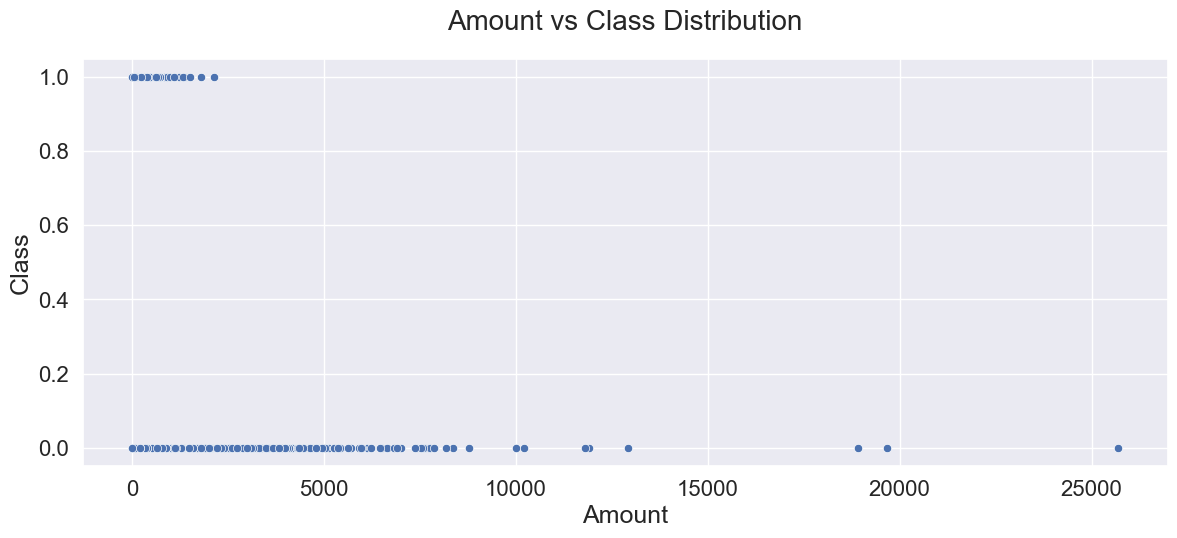

In [53]:
# Create a scatter plot to observe the distribution of classes with Amount
fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set2')

# PLot the relation between the Class[] variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df_credit['Amount'], y='Class', palette=cmap, data=df_credit)
# sns.scatterplot(x=df_Fraud['Amount'], y='Class', palette=cmap, data=df_Fraud)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Amount vs Class Distribution', size=20, y=1.05)
plt.show()

In [ ]:
'''
Interpretation:
===============
Most of the fradulent transactions are in the range of 0-1000 dollars
Highest Fraud transaction was at between 2100-2150 dollars
'''

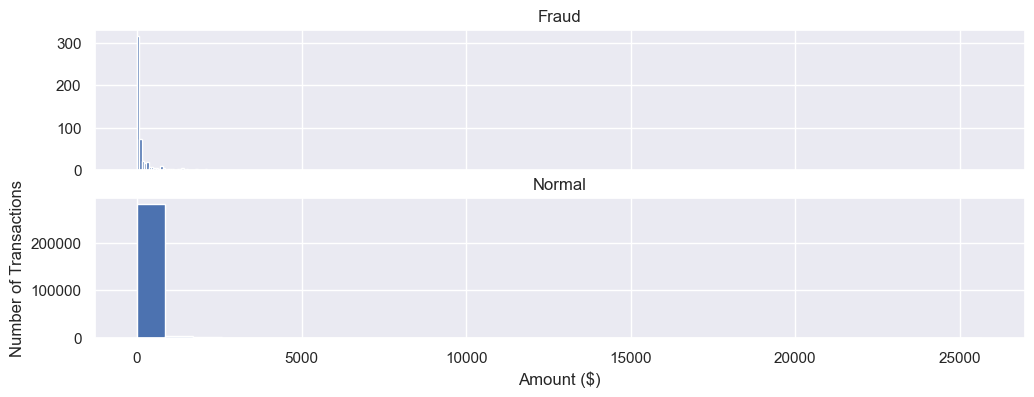

In [55]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df_credit.Amount[df_credit.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df_credit.Amount[df_credit.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
#plt.yscale('log')
plt.show()

In [57]:
# Understanding correlation for Class[] in data:
print("Most important features related to target variable Class")

creditcor1 = df_credit.corr()['Class']
# convert series to dataframe so it can be sorted
creditcor1 = pd.DataFrame(creditcor1)
# correct column label from SalePrice to correlation
creditcor1.columns = ["Correlation"]
# sort correlation
creditcor2 = creditcor1.sort_values(by=['Correlation'], ascending=False)
creditcor2.head(10)

Most important features related to target variable Class


Correlation
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536

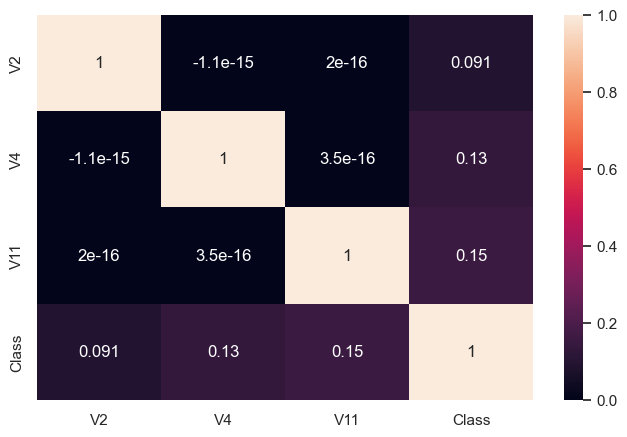

In [59]:
# Lets plot the heatmap against the relatively strong correlation (in the above case it is >0.09) with the target variable:

top_feature = creditcor.index[abs(creditcor['Class']>=0.09)]
plt.subplots(figsize=(8, 5))
top_corr = df_credit[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

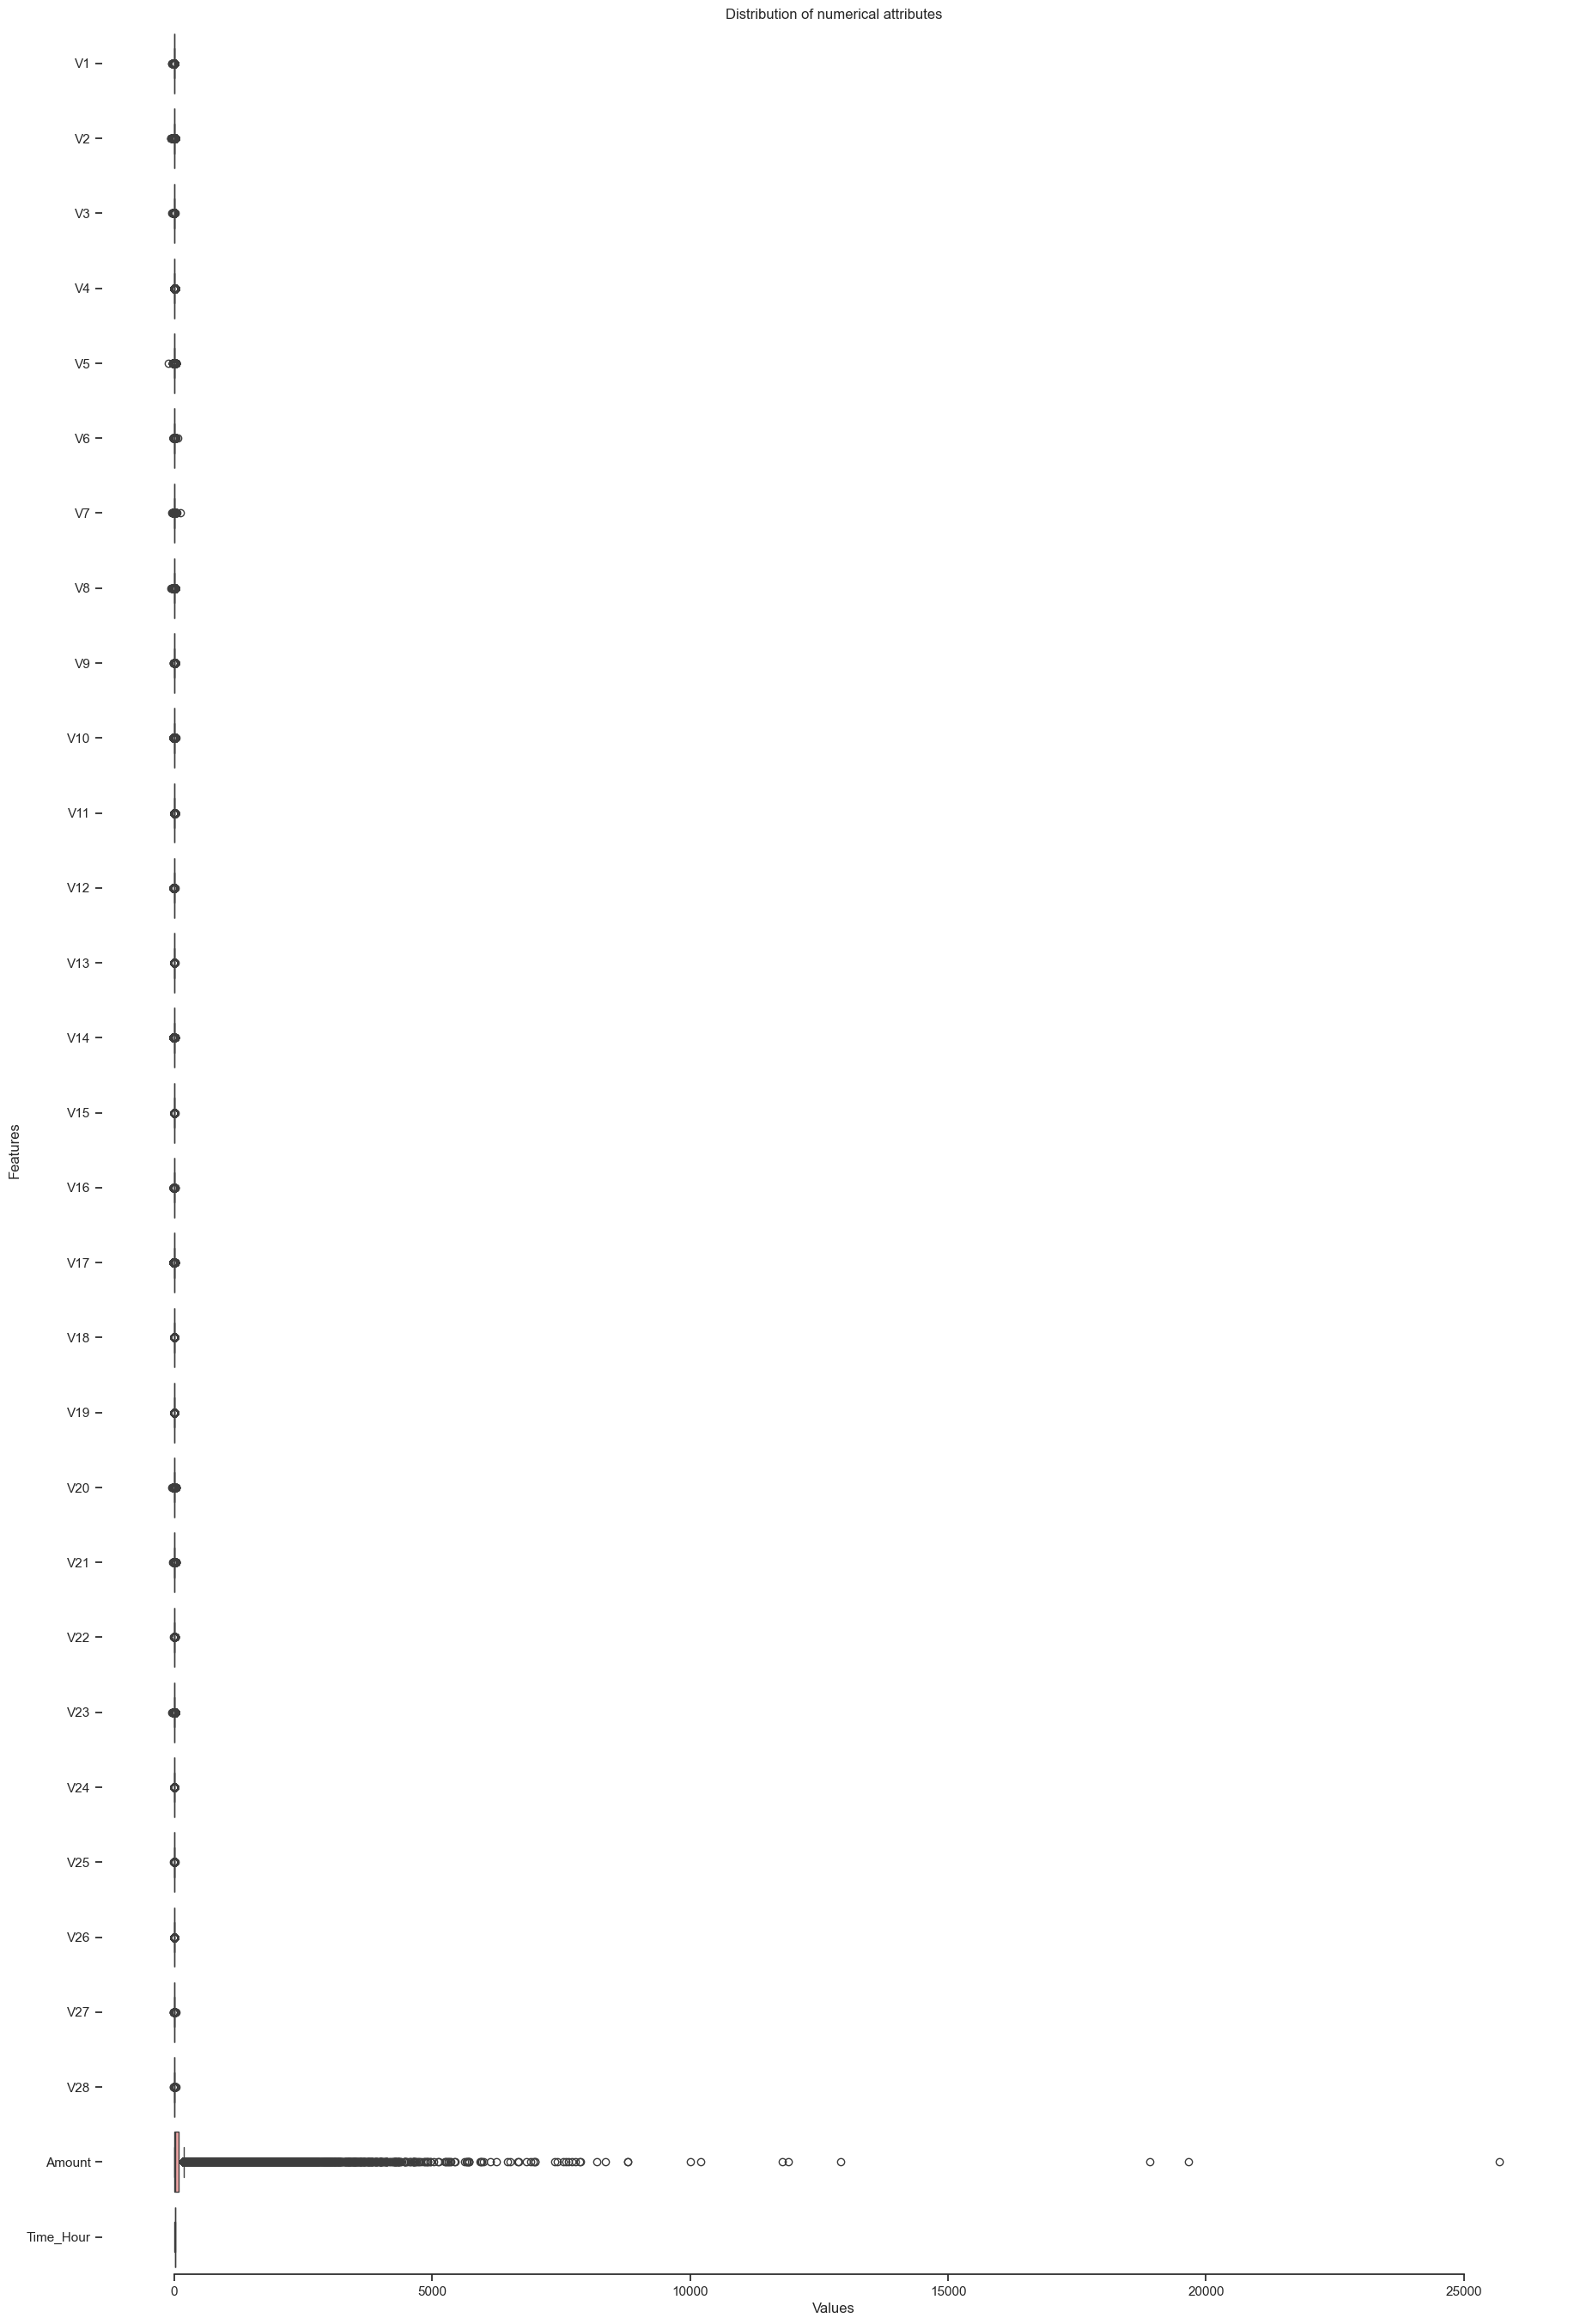

In [61]:
# Boxplot to understand the distribution of numerical attributes :

# Selecting only numerical feature from the dataframe:
# for this Numpy is used
numeric_features = df_credit.select_dtypes(include=[np.number]).columns.tolist()

# Excluding BINARY target feature and Time variable as its not needed for transformation : 
li_not_plot = ['Class','Time']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

# sns.set_style("whitegrid")
sns.set_style("ticks")
f, ax = plt.subplots(figsize=(22,34))
# Using log scale:
#ax.set_xscale("log")
ax = sns.boxplot(data=df_credit[li_transform_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of numerical attributes")
sns.despine(trim=True,left=True)
plt.show()

In [63]:
# As we have derived the Day/Hour/Minutes from the time column we will drop Time/day/minutes columns
## Also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour
## df_credit.drop('Time', axis = 1, inplace= True)
## what ever we are droping, we will perform in the same dataframe by stating inplace = True
df_credit.drop(['Time','Time_Day', 'Time_Min'], axis = 1, inplace= True)

KeyError: "['Time', 'Time_Day', 'Time_Min'] not found in axis"

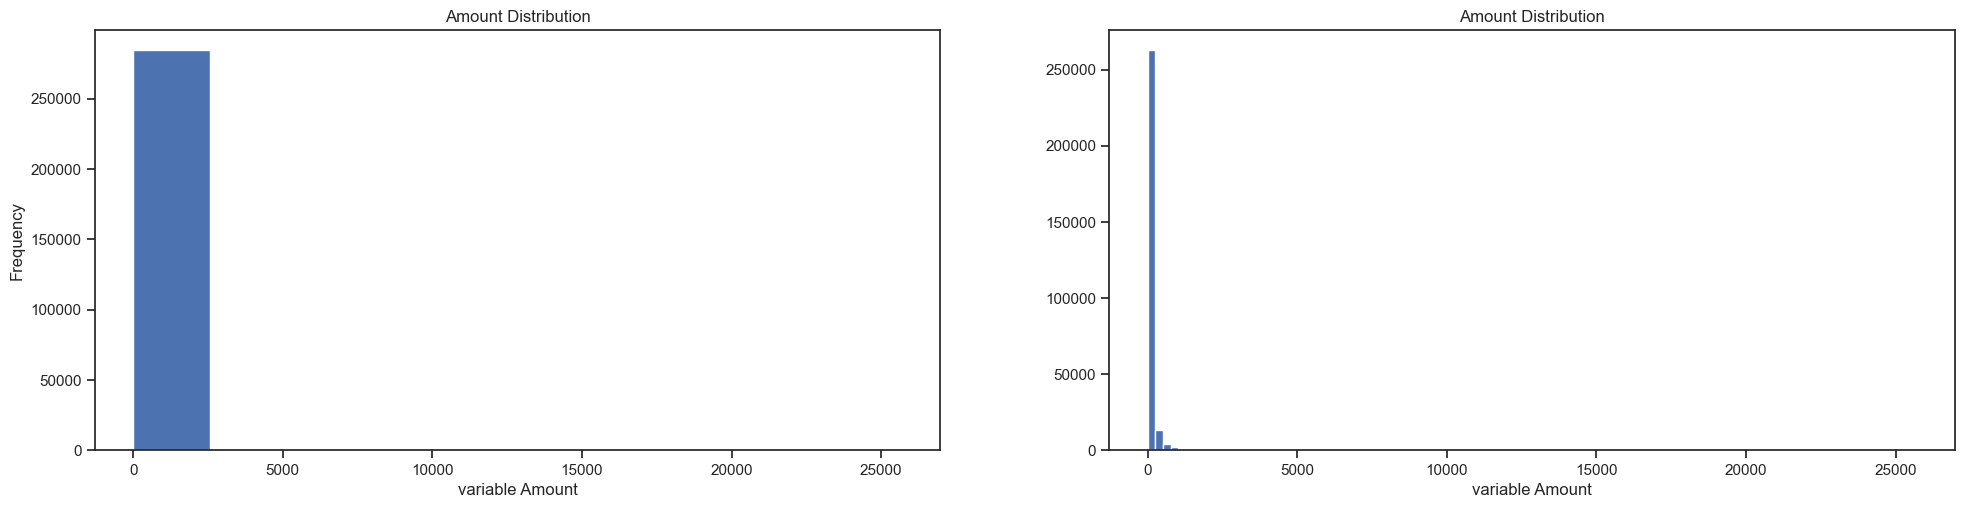

In [65]:
# to understand the Amount variable we will plot the distribution of Amount over Frequecy

plt.figure(figsize=(24, 12))

plt.subplot(2,2,1)
plt.title('Amount Distribution')
df_credit['Amount'].astype(int).plot.hist();
plt.xlabel("variable Amount")
#plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("variable Amount")
plt.hist(df_credit['Amount'],bins=100)
plt.show()

In [69]:
# Train Test Split of Data
## Create X and y dataset for independent and dependent data
## Seperating the input features and the target variable
## X is input feature and y is target variable
y = df_credit['Class']
X = df_credit.drop(['Class'], axis=1)

X.head(10)

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   
5  0.260314 -0.568671 -0.371407  ... -0.208254 -0.559825 -0.026398 -0.371427   
6  0.081213  0.464960 -0.099254  ... -0.167716 -0.270710 -0.154104 -0.780055   
7 -3.807864  0.615375  1.249376  ...  1.943465 -1.015455  0.057504 -0.649709   
8  0.851084 -0.392048 -0.410430  ... -0.073425 -0.268092 -0.204233  1.011592   
9  0.069539 -0.736727 -0.366846  ... -0.246914 -0.633753 -0.120794 -0.385050   

        V25       V26       V27       V28  Amount  Time_Hour  
0  0.128539 -0.189115  0.133558 -0.021053  149.62          0  
1  0.167170  0.125895 -0.008983  0.014724    2.69          0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66          0  
3  0.647376 -0.221929  0.062723  0.061458  123.50          0  
4 -0.206010  0.502292  0.219422  0.215153   69.99          0  
5 -0.232794  0.105915  0.253844  0.081080    3.67          0  
6  0.750137 -0.257237  0.034507  0.005168    4.99          0  
7 -0.415267 -0.051634 -1.206921 -1.085339   40.80          0  
8  0.373205 -0.384157  0.011747  0.142404   93.20          0  
9 -0.069733  0.094199  0.246219  0.083076    3.68          0  

[10 rows x 30 columns]

In [109]:
X.iloc[0].tolist()

[-1.3598071336738,
 -0.0727811733098497,
 2.53634673796914,
 1.37815522427443,
 -0.338320769942518,
 0.462387777762292,
 0.239598554061257,
 0.0986979012610507,
 0.363786969611213,
 0.0907941719789316,
 -0.551599533260813,
 -0.617800855762348,
 -0.991389847235408,
 -0.311169353699879,
 1.46817697209427,
 -0.470400525259478,
 0.207971241929242,
 0.0257905801985591,
 0.403992960255733,
 0.251412098239705,
 -0.018306777944153,
 0.277837575558899,
 -0.110473910188767,
 0.0669280749146731,
 0.128539358273528,
 -0.189114843888824,
 0.133558376740387,
 -0.0210530534538215,
 149.62,
 0.0]

In [71]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [73]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

In [75]:
# examining the scale for X_train
X_train.head(15)['Amount']

201788       0.77
179369      36.14
73138      179.95
208679     181.06
206534       8.20
3033         0.90
228176      32.90
193292     161.96
40555     1169.40
240680       3.59
235359       7.70
36498       30.00
95731      165.02
125766     180.00
204872       1.00
Name: Amount, dtype: float64

In [77]:
# examining the scale for X_test
X_test.head(15)['Amount']

49089       1.99
154704      6.99
67247     306.16
251657      0.99
201903     30.27
6079        5.00
270936    237.82
40673      36.94
143209    119.88
238543    420.00
151055    177.50
141251      4.90
32238       3.82
284397     17.18
158972     12.95
Name: Amount, dtype: float64

In [67]:
'''
Standardization isn't required for logistic regression.
The main goal of standardizing features is to help convergence of the technique used for optimization.
# Instantiate the Scaler
scaler = StandardScaler()
'''

"\nStandardization isn't required for logistic regression.\nThe main goal of standardizing features is to help convergence of the technique used for optimization.\n# Instantiate the Scaler\nscaler = StandardScaler()\n"

In [95]:
'''
# applying standardization to X_train
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
# examining the scale for X_train post standardization
X_train.head(15)['Amount']
'''

201788   -0.345273
179369   -0.206439
73138     0.358043
208679    0.362400
206534   -0.316109
3033     -0.344763
228176   -0.219157
193292    0.287429
40555     4.241829
240680   -0.334204
235359   -0.318072
36498    -0.230540
95731     0.299440
125766    0.358240
204872   -0.344370
Name: Amount, dtype: float64

In [97]:
'''
# applying standardization to X_test
X_test['Amount'] = scaler.fit_transform(X_test[['Amount']])
# examining the scale for X_test post standardization
X_test.head(15)['Amount']
'''

49089    -0.367842
154704   -0.346160
67247     0.951188
251657   -0.372179
201903   -0.245206
6079     -0.354789
270936    0.654832
40673    -0.216282
143209    0.143387
238543    1.444853
151055    0.393255
141251   -0.355223
32238    -0.359906
284397   -0.301971
158972   -0.320314
Name: Amount, dtype: float64

In [79]:
# Preserve X_test & y_test to evaluate on the test data once you build the model
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


In [81]:
cols = list(X.columns.values)
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Time_Hour']

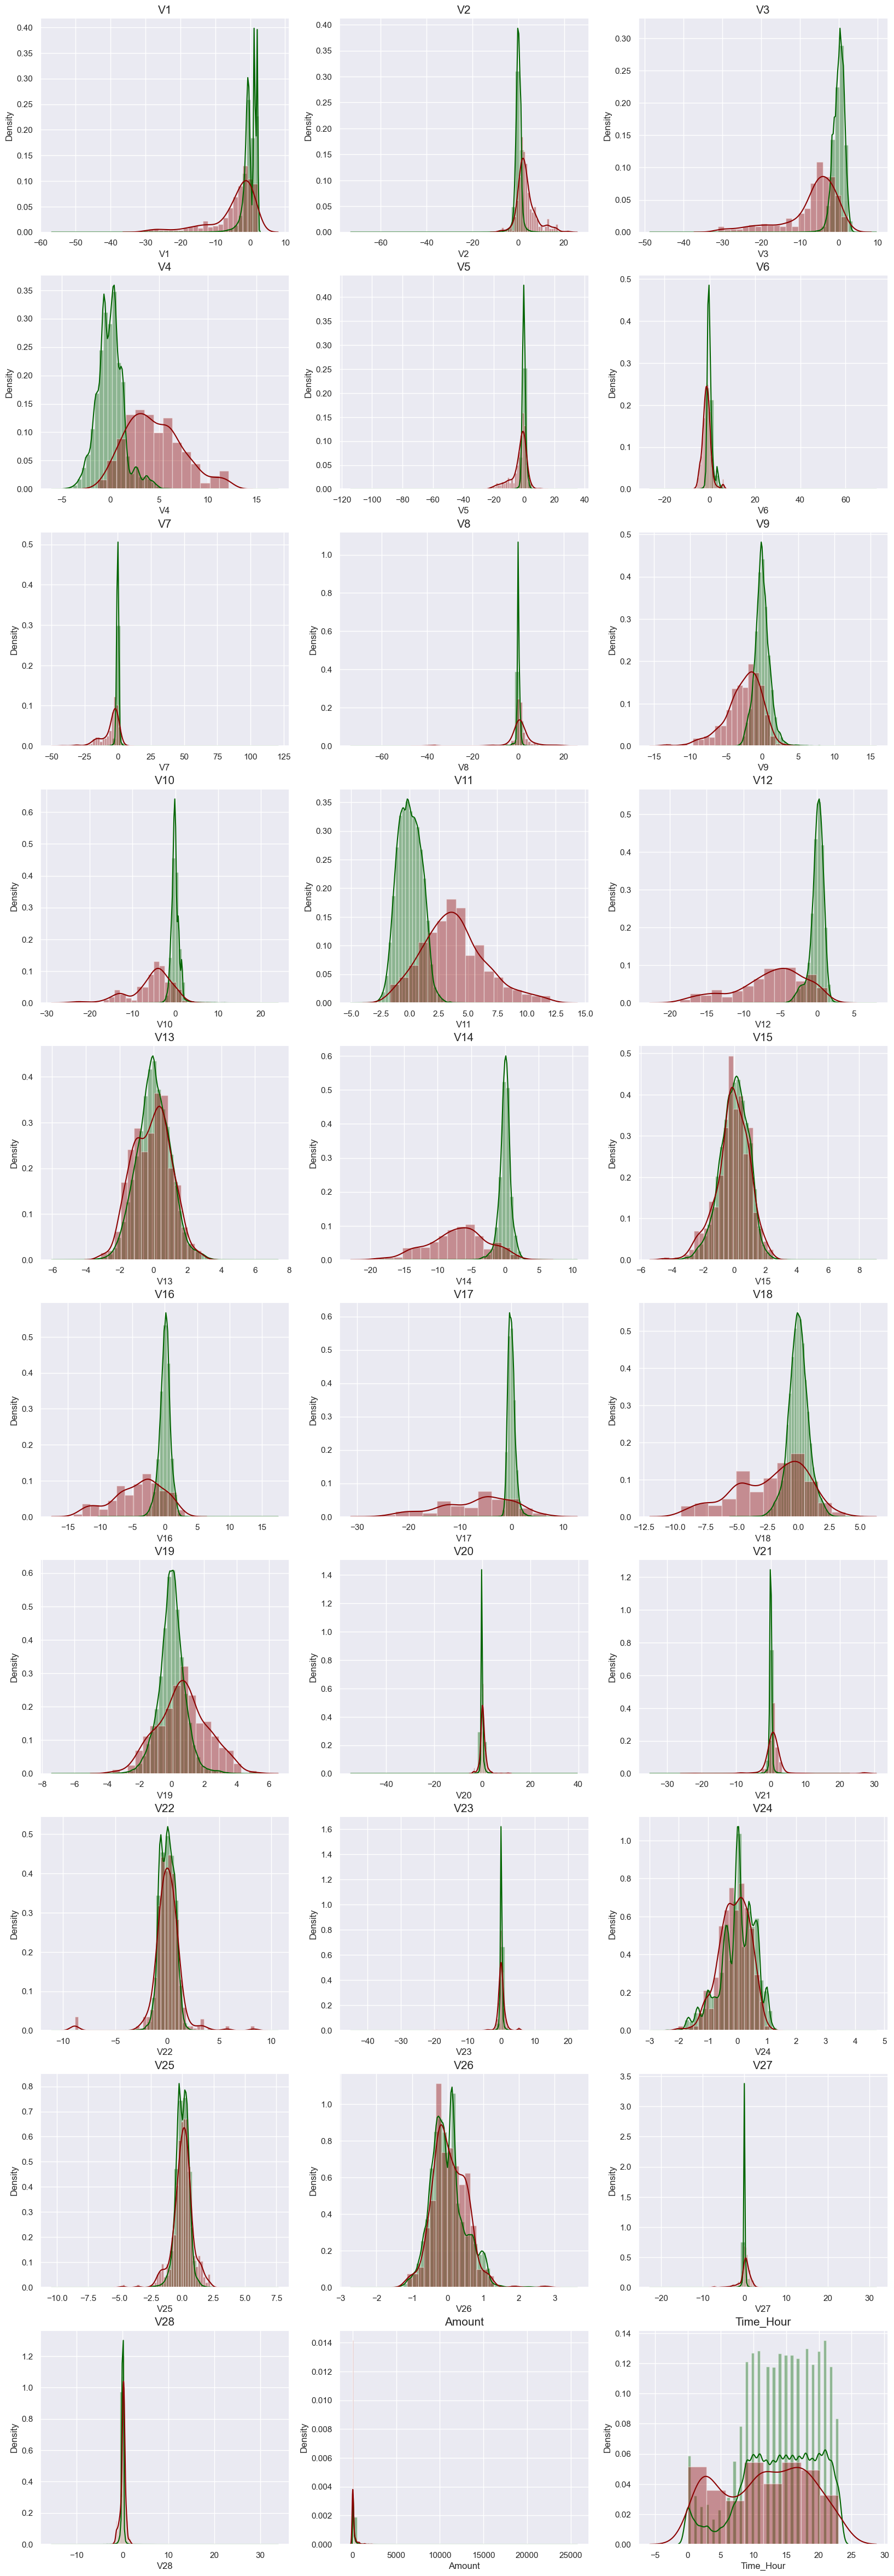

In [83]:
# Skewness detection from the dataset using histogram
genuine_records = df_credit.Class == 0
fraud_records = df_credit.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][genuine_records], color='darkgreen')
  sns.distplot(X[col][fraud_records], color='darkred')
  plt.title(col, fontsize=15)
plt.show()

In [ ]:
#Create model functions for Logistic Regression, KNN, SVM, Decision Tree & Random Forest

In [87]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])
df_Results.head()

Empty DataFrame
Columns: [Data_Imbalance_Handiling, Model, Accuracy, roc_value, threshold]
Index: []

In [89]:
# Confusion Matrix is used to evaluate the quality of the output
## The diagonal elements represent the number of points for which the predicted label is equal to the true label
##  off-diagonal elements are those that are mislabeled by the classifier
## The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  classNames = ['Genuine','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
        
  plt.show()

In [91]:
def buildAndRunLogisticModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model #import the package
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))   ## Range from 1e-10 to 1000000000.0
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)  ## K-Fold cross-validator

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C                  ## Regularization strength
          ,penalty='l2'
          ,scoring='roc_auc'         ## Receiver Operating Characteristic_Area Under the Curve
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'        ## Algorithm used in optimization problem. Default is ‘lbfgs’.
          ,tol=10                    
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'       ## ‘liblinear’ might be slower in LogisticRegressionCV. liblinear’ is suitable for small datasets
          ,tol=10
      )
  ## searchCV.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  searchCV_l1.fit(X_train, y_train)
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_) 

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_) 


  #find predicted vallues
  y_pred_l2 = searchCV_l2.predict(X_test)
  y_pred_l1 = searchCV_l1.predict(X_test)
  

  #Find predicted probabilities
  ## keep probabilities for the positive outcome only
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))

  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  ## Receiver Operating Characteristic_Area Under the Curve
  from sklearn.metrics import roc_auc_score
  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  ## TPR is True Positive Rate on the y-axis and FPR is False Positive Rate on the x-axis
  ## FPR measures the proportion of negative instances that are incorrectly classified as positive by the model
  ## FPR = FP / (FP + TN) and TPR = TP / (TP + FN)
  ## FP incorrectly classified Positive instanc (Fales Positive)
  ## TN incorrectly classified Positive instanc (True Negative)
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results._append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results._append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

In [93]:
def buildAndRunKNNModels(df_Results,DataImabalance, X_train,y_train, X_test, y_test ):
  # Evaluate KNN  model
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import roc_auc_score
  # create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))

  ## keep probabilities for the positive outcome only
  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc score
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  ## FPR is False Positive Rate on the x-axis and TPR is True Positive Rate on the y-axis
  ## FPR measures the proportion of negative instances that are incorrectly classified as positive by the model
  ## FPR = FP / (FP + TN) and TPR = TP / (TP + FN)
  ## FP incorrectly classified Positive instanc (Fales Positive)
  ## TN incorrectly classified Positive instanc (True Negative)
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results._append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  # df_Results = pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]) #,ignore_index= True

  return df_Results

In [95]:
def buildAndRunSVMModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate SVM (Support Vector Machines) model with sigmoid kernel  model
  from sklearn.svm import SVC     ## SVC --> Support Vector Classifier
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42) ## available kernels are 'linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test, y_pred_SVM))



  # Run classifier
  ## initiallizing classifier with Probability = True
  ## so we cannot take the existing  clf initialized above  
  classifier = SVC(kernel='sigmoid' , probability=True)
  ## keep probabilities for the positive outcome only
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
  
  print("SVM roc_value: {0}" .format(roc_value))
  ## FPR is False Positive Rate on the x-axis and TPR is True Positive Rate on the y-axis
  ## FPR measures the proportion of negative instances that are incorrectly classified as positive by the model
  ## FPR = FP / (FP + TN) and TPR = TP / (TP + FN)
  ## FP incorrectly classified Positive instanc (Fales Positive)
  ## TN incorrectly classified Positive instanc (True Negative)
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results._append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [97]:
def buildAndRunTreeModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  ## Gini impurity and entropy are metrics used to measure the "purity" or "homogeneity" of a node
  ## Gini(t) = 1 - Σ(p_i)^2, where 't' is the node and 'p_i' is the probability of class 'i' at that node
  ## Entropy(t) = - Σ(p_i * log2(p_i)), where 't' is the node and 'p_i' is the probability of class 'i' at that node
  ## Decision Tree Classifiers predict categorical outcomes (like spam vs. geniuen)
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score
  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]  ## keep probabilities for the positive outcome only
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
  ## FPR is False Positive Rate on the x-axis and TPR is True Positive Rate on the y-axis
  ## FPR measures the proportion of negative instances that are incorrectly classified as positive by the model
  ## FPR = FP / (FP + TN) and TPR = TP / (TP + FN)
  ## FP incorrectly classified Positive instanc (Fales Positive)
  ## TN incorrectly classified Positive instanc (True Negative)
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
  
      df_Results = df_Results._append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [111]:
def buildAndRunRandomForestModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import roc_auc_score

  # Create the model with 100 trees
  ## Criterion is default=”gini”
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,    ## samples are used when building trees
                                max_features = 'sqrt', random_state=42)  ## If “sqrt”, then max_features=sqrt(n_features)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  ## FPR is False Positive Rate on the x-axis and TPR is True Positive Rate on the y-axis
  ## FPR measures the proportion of negative instances that are incorrectly classified as positive by the model
  ## FPR = FP / (FP + TN) and TPR = TP / (TP + FN)
  ## FP incorrectly classified Positive instanc (Fales Positive)
  ## TN incorrectly classified Positive instanc (True Negative)
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results._append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results, RF_model

In [101]:
# minimizing skewness present in the distribution
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

In [102]:
#Create Dataframe for Transformed data
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

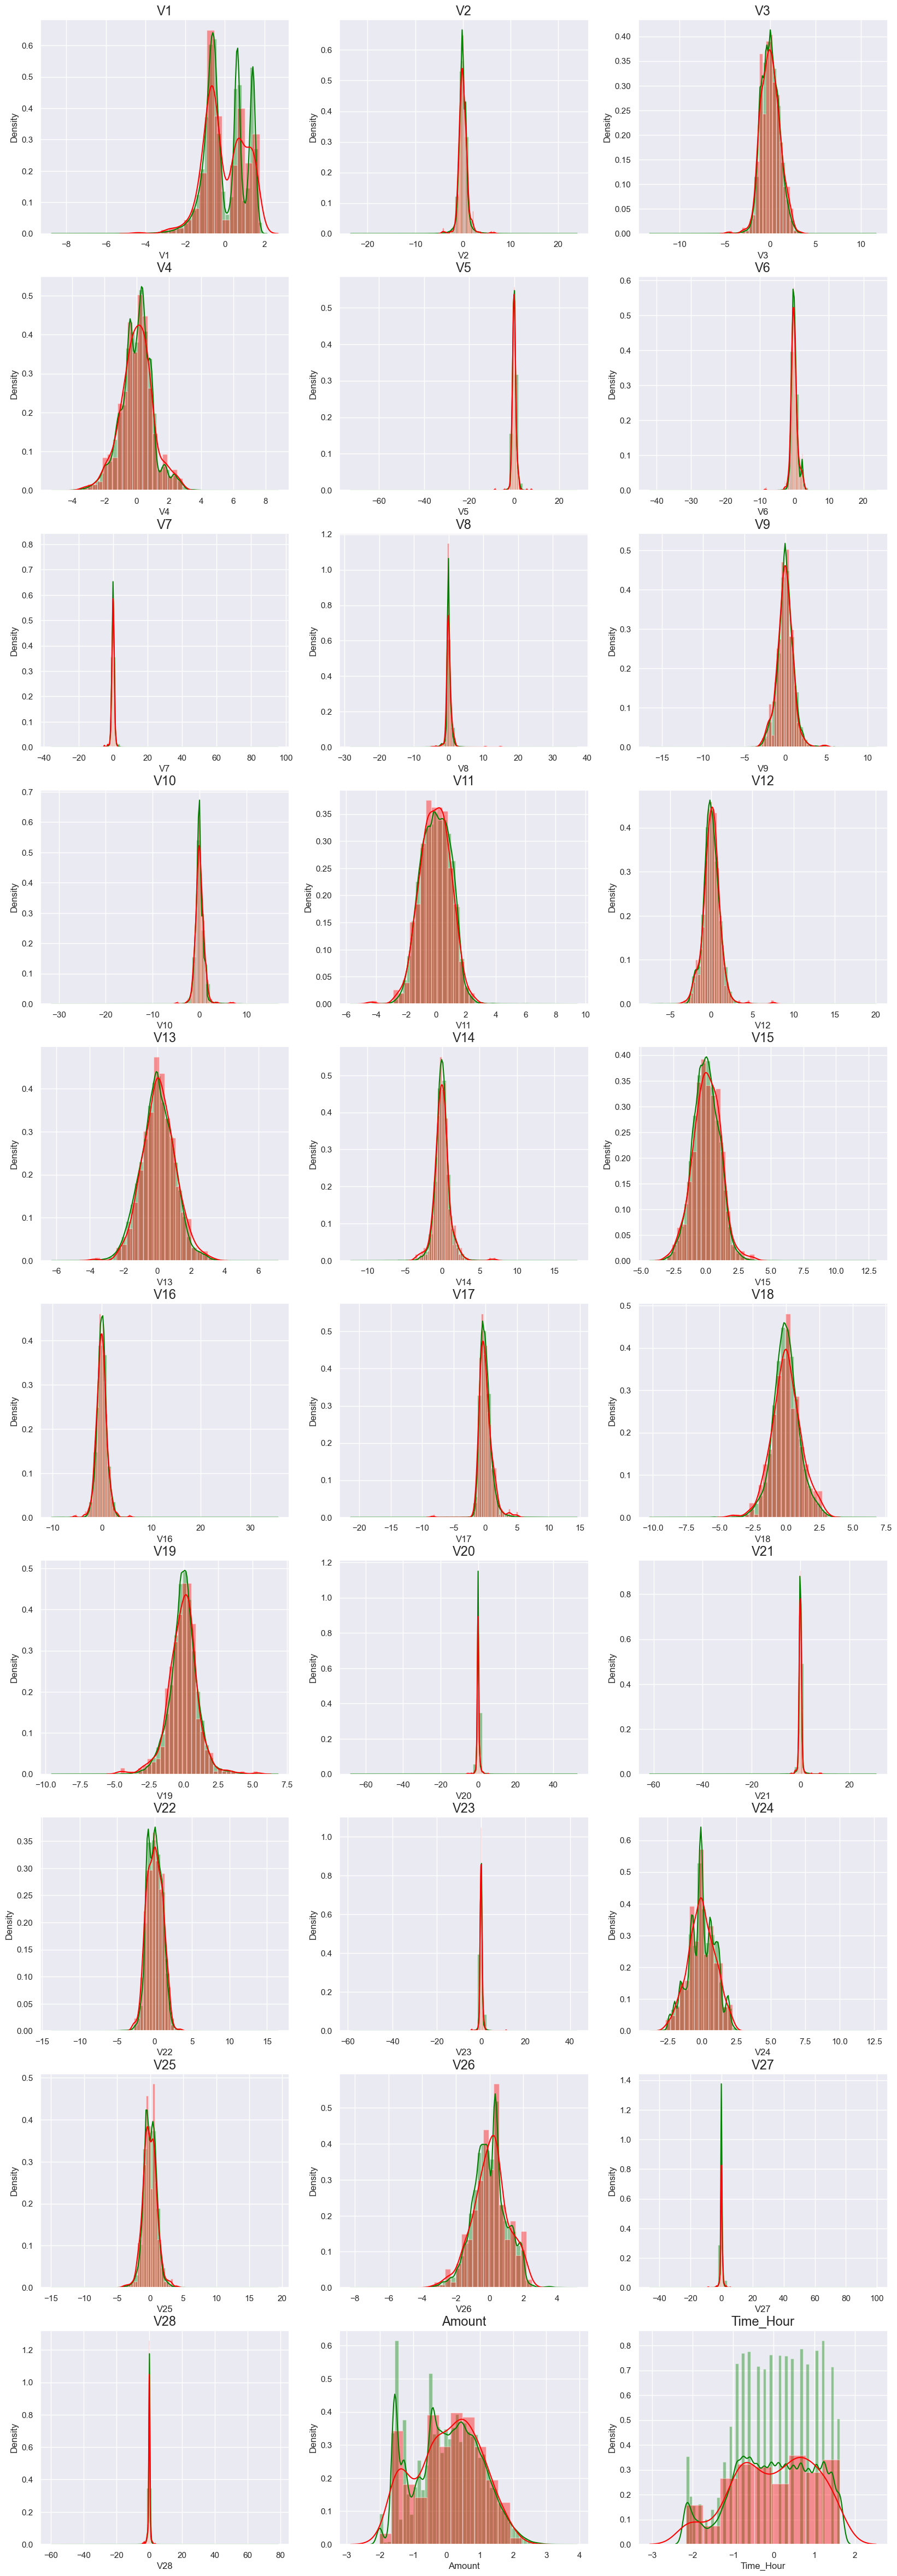

In [103]:
# plot the histogram of a variable from the train dataset again to see the result 

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df[col][genuine_records], color='green')
  sns.distplot(X_train_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

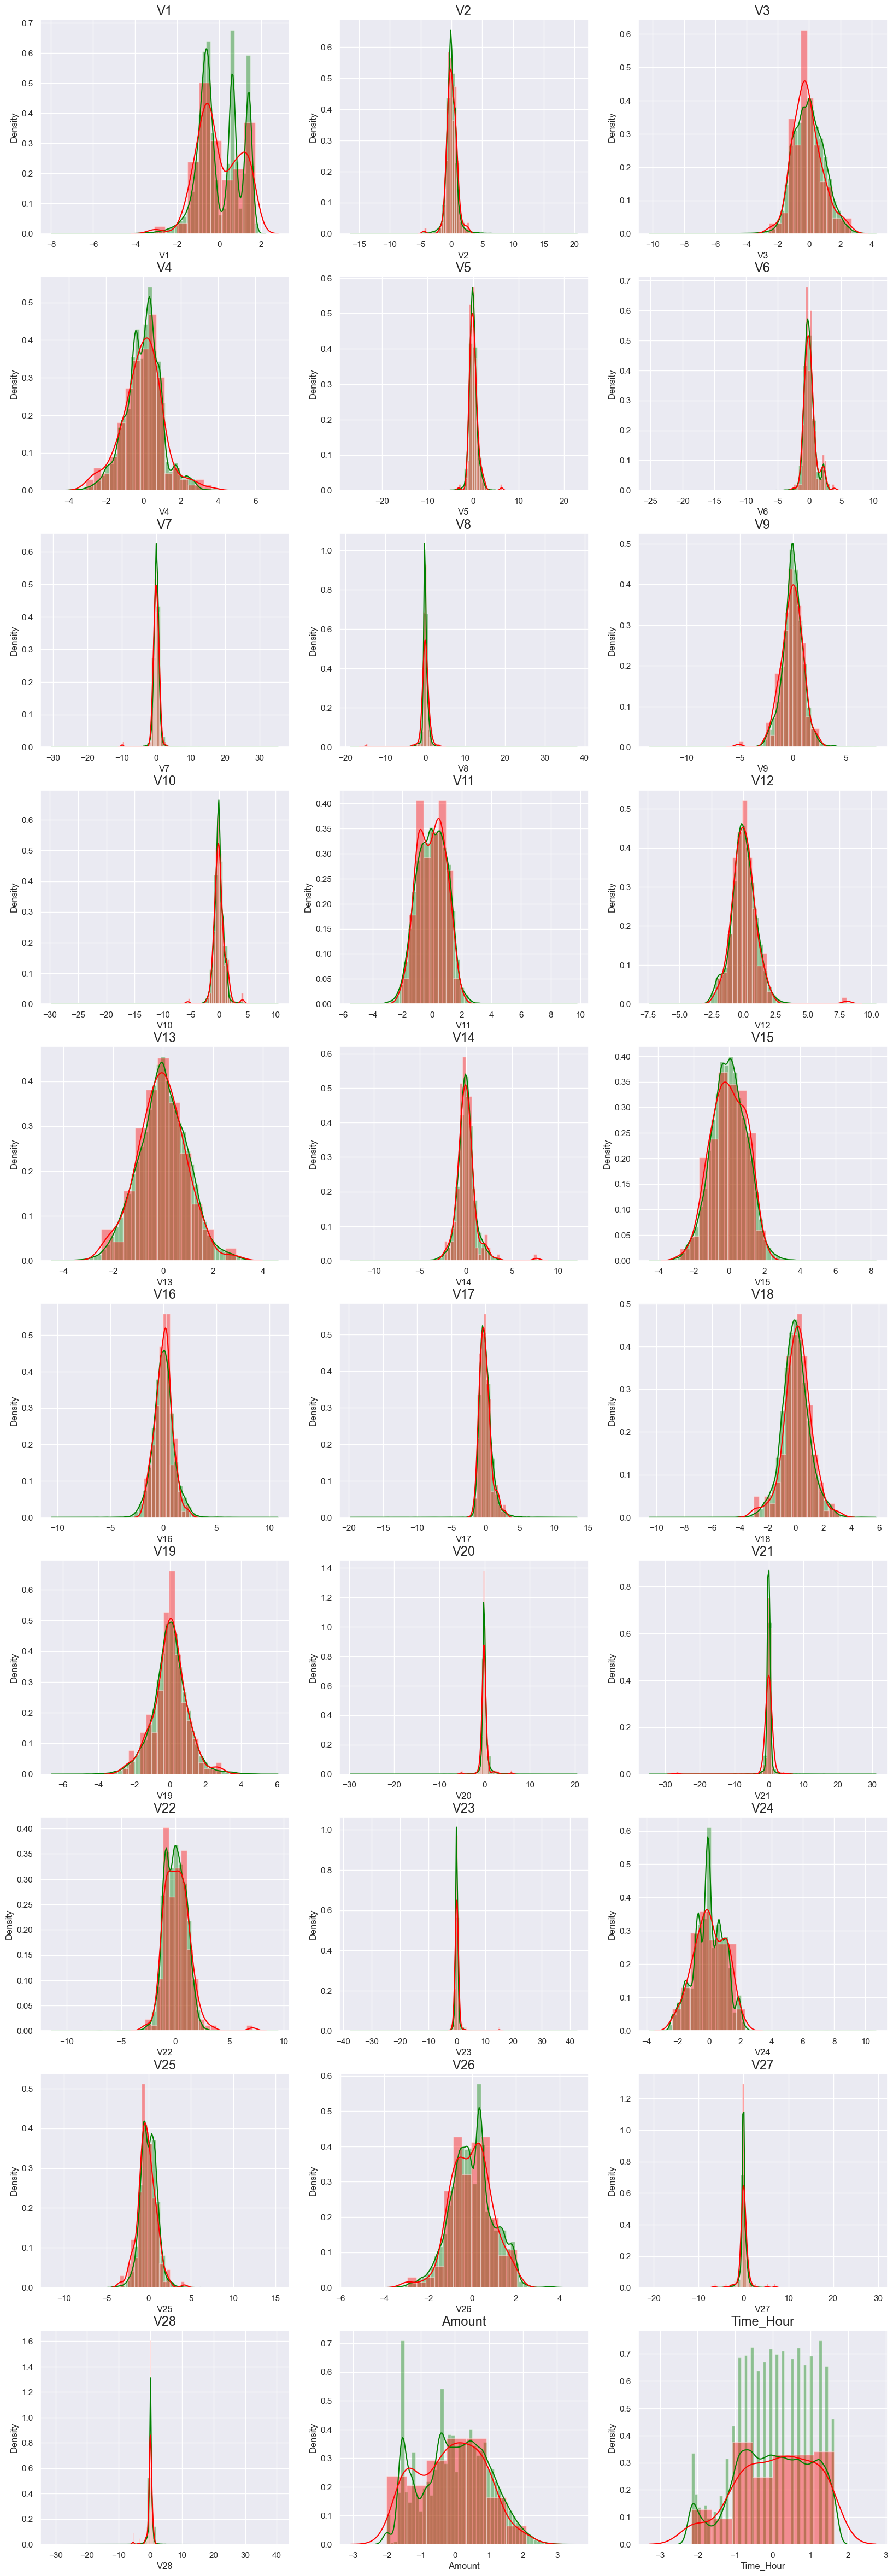

In [89]:
# plot the histogram of a variable from the test dataset again to see the result 
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_test_pt_df[col][genuine_records], color='green')
  sns.distplot(X_test_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.5
Max auc_roc for l1: 0.985410899045824
Parameters for l2 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,

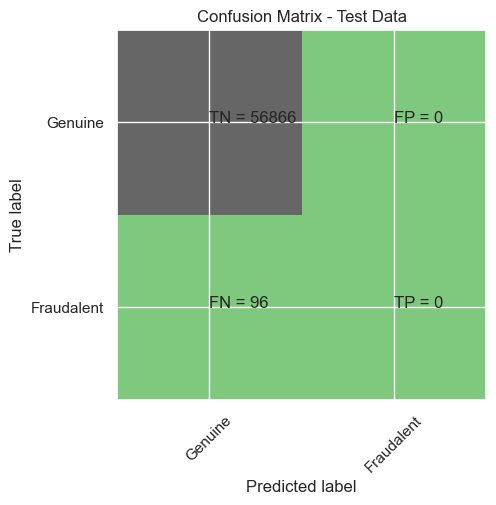

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.00      0.00      0.00        96

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9988413328183702
Confusion Matrix


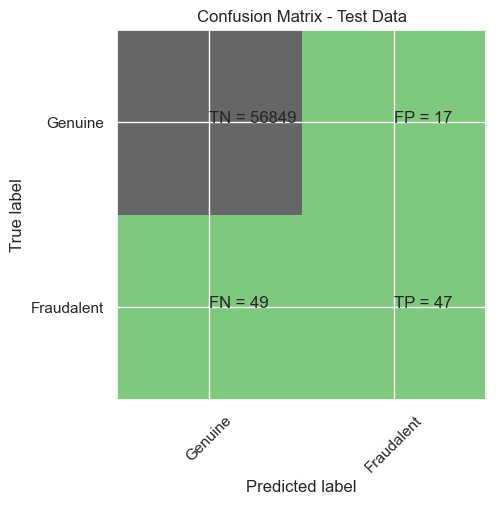

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.73      0.49      0.59        96

    accuracy                           1.00     56962
   macro avg       0.87      0.74      0.79     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.5
l2 threshold: inf
ROC for the test dataset 50.0%


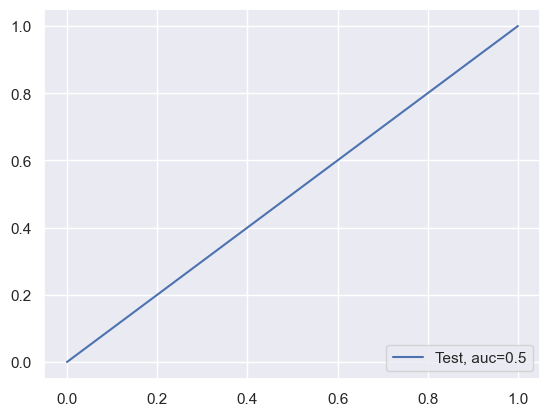

l1 roc_value: 0.9639030791685718
l1 threshold: 0.009276493844821432
ROC for the test dataset 96.4%


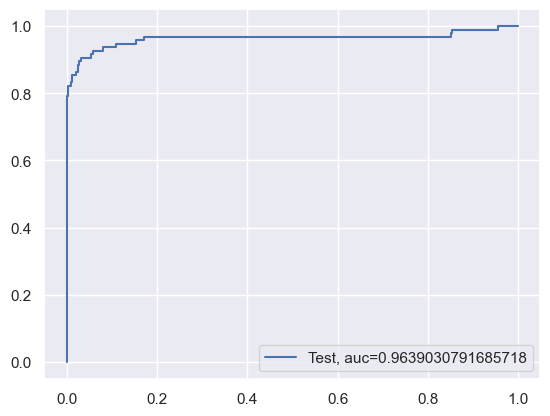

Time Taken by Model: --- 54.95514726638794 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9992977774656788
Confusion Matrix


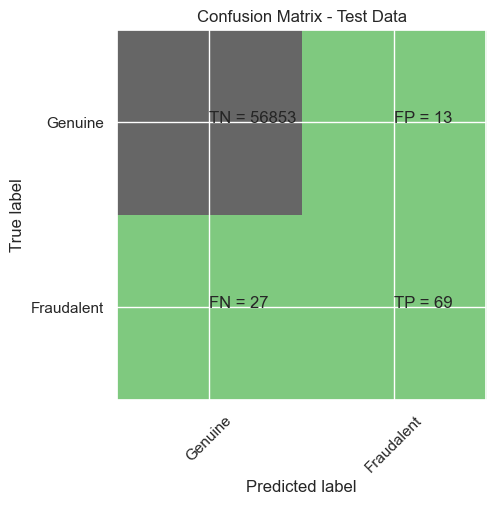

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.72      0.78        96

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.900851068740548
KNN threshold: 0.2
ROC for the test dataset 90.1%


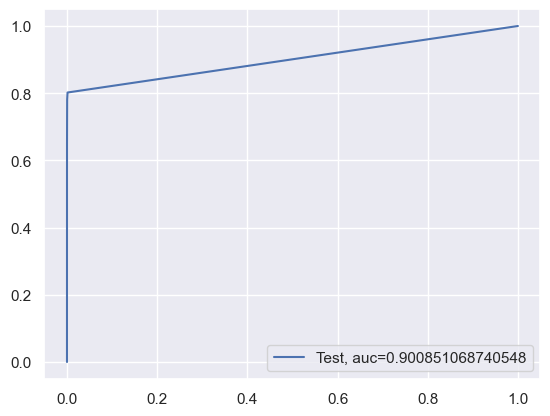

Time Taken by Model: --- 19.15591597557068 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9988062216916541
Confusion Matrix


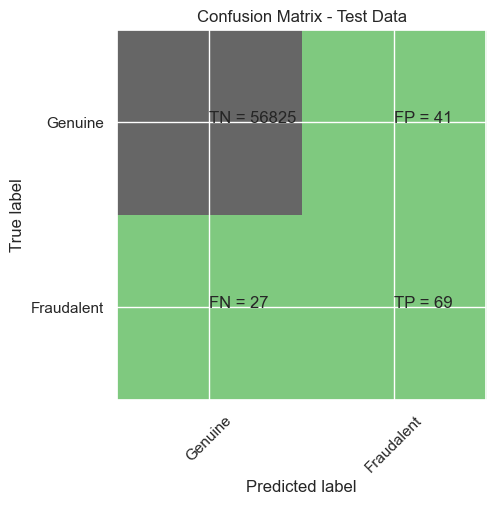

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.63      0.72      0.67        96

    accuracy                           1.00     56962
   macro avg       0.81      0.86      0.83     56962
weighted avg       1.00      1.00      1.00     56962

gini tree_roc_value: 0.8590145033939437
Tree threshold: 1.0
ROC for the test dataset 85.9%


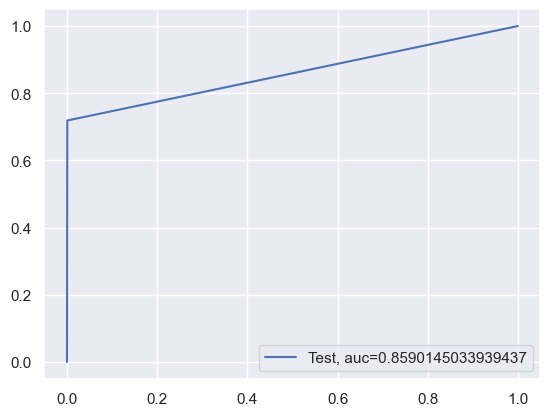

entropy score: 0.9990519995786665
Confusion Matrix


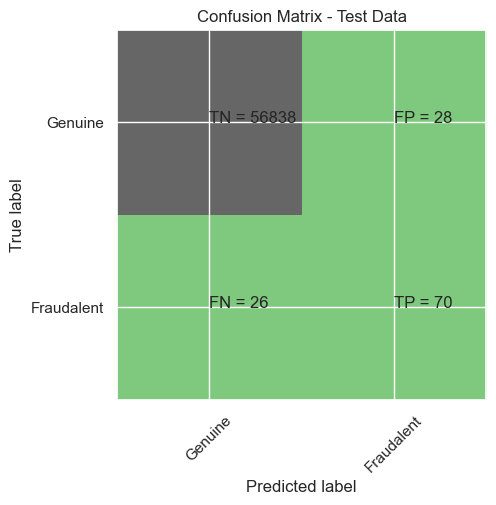

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.71      0.73      0.72        96

    accuracy                           1.00     56962
   macro avg       0.86      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962

entropy tree_roc_value: 0.8643371405291973
Tree threshold: 1.0
ROC for the test dataset 86.4%


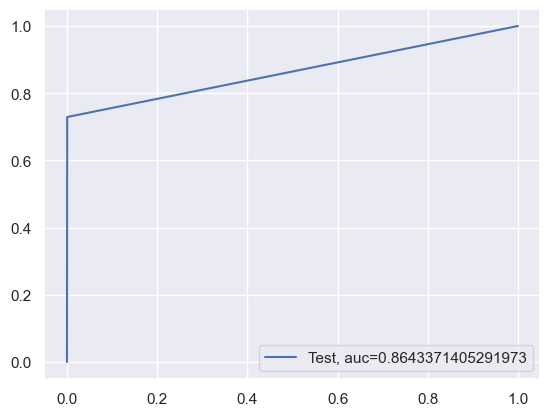

Time Taken by Model: --- 23.438594818115234 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9993504441557529
Confusion Matrix


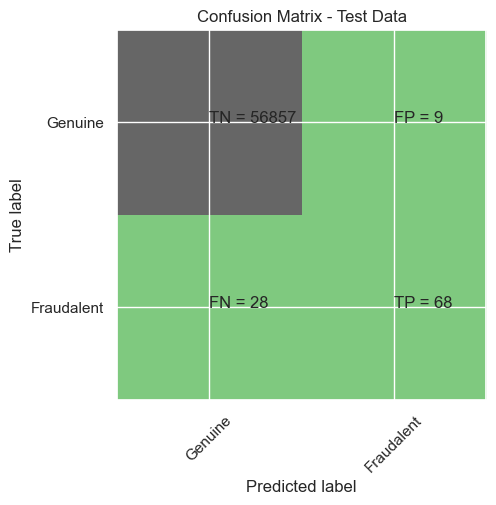

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.71      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value: 0.940564037972309
Random Forest threshold: 0.01
ROC for the test dataset 94.1%


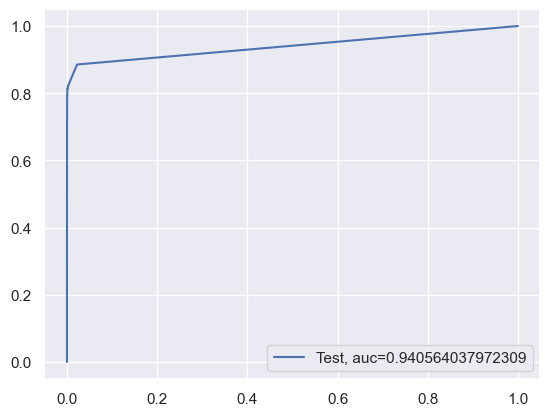

Time Taken by Model: --- 156.4372477531433 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9985604438046417
Confusion Matrix


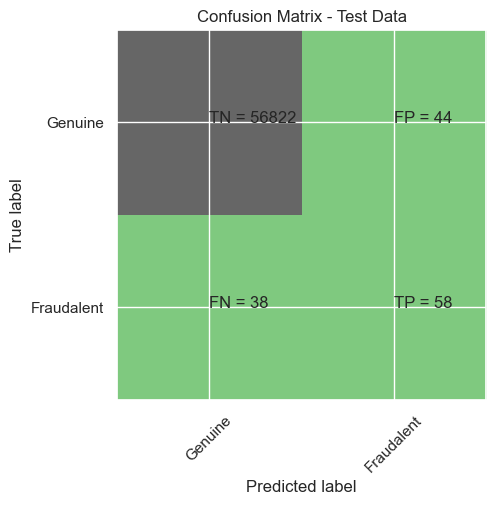

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.57      0.60      0.59        96

    accuracy                           1.00     56962
   macro avg       0.78      0.80      0.79     56962
weighted avg       1.00      1.00      1.00     56962

SVM roc_value: 0.8913154022907654
SVM threshold: 0.0006738670833456809
ROC for the test dataset 89.1%


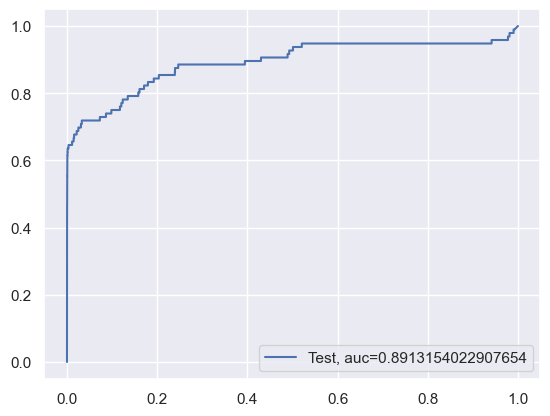

Time Taken by Model: --- 24.226941108703613 seconds ---


In [140]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [152]:
df_Results.head(len(df_Results))

Data_Imbalance_Handiling                                       Model  \
0        Power Transformer  Logistic Regression with L2 Regularisation   
1        Power Transformer  Logistic Regression with L1 Regularisation   
2        Power Transformer                                         KNN   
3        Power Transformer               Tree Model with gini criteria   
4        Power Transformer            Tree Model with entropy criteria   
5        Power Transformer                               Random Forest   
6        Power Transformer                                         SVM   

   Accuracy  roc_value  threshold  
0  0.998315   0.500000        inf  
1  0.998841   0.963903   0.009276  
2  0.999298   0.900851   0.200000  
3  0.998806   0.859015   1.000000  
4  0.999052   0.864337   1.000000  
5  0.999350   0.940564   0.010000  
6  0.998560   0.891315   0.000674

In [ ]:
## Perform cross validation with RepeatedKFold
## improve the estimated performance of a machine learning model
## by training and testing the model on different subsets of the data
## This minimizes the risk of overfitting (Overfitting model means the model learns the training data too well)
## by RepeatedKFold cross validation we generalizes the model well to unseen data

In [155]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     1      2      4 ... 284804 284805 284806] TEST: [     0      3     22 ... 284792 284801 284803]
TRAIN: [     0      1      2 ... 284803 284804 284806] TEST: [     4      9     10 ... 284795 284796 284805]
TRAIN: [     0      3      4 ... 284803 284805 284806] TEST: [     1      2      5 ... 284790 284794 284804]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     7     17     19 ... 284797 284800 284802]
TRAIN: [     0      1      2 ... 284803 284804 284805] TEST: [     8     13     16 ... 284798 284799 284806]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    11     15     17 ... 284795 284798 284802]
TRAIN: [     0      2      3 ... 284802 284804 284806] TEST: [     1     10     18 ... 284797 284803 284805]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     5     12     13 ... 284796 284799 284801]
TRAIN: [     0      1      4 ... 284802 284803 284805] TEST: [     2      3      9 ... 284793 284804 284806]
TRAIN: [     1     

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.5654926232294357
Max auc_roc for l1: 0.9698576931389467
Parameters for l2 regularisations
[[-1.14587323e-07  8.62510666e-08 -1.88358742e-07  1.38248759e-07
  -7.78576980e-08 -3.52788891e-08 -1.39787567e-07  2.51693194e-08
  -5.51076787e-08 -1.48217236e-07  9.68353948e-08 -1.74863796e-07
   2.94253397e-09 -1.79557342e-07  2.63232548e-09 -1.16063182e-07
  -1.77001754e-07 -5.56817150e-08  2.59665587e-08  3.18744825e-09
   2.38028289e-08 -7.11575203e-09  4.12054930e-09 -4.23032235e-09
   7.68724380e-10  1.97970201e-09  2.35798191e-09 -8.30061656e-10
  -6.66277074e-04 -1.06192884e-04]]
[-7.54994156e-06]
{1: array([[0.52124664, 0.52028612, 0.51879168, 0.51658104, 0.51658104,
        0.51658104, 0.51658104, 0.51658104, 0.51658104, 0.51658104,
        0.51658104, 0.51658104, 0.51658104, 0.51658104, 0.51658104,
        0.51658104, 0.51658104, 0.51658104, 0.51658104, 0.51658104],
       [0.58396922, 0.58431792, 0.58428008, 0

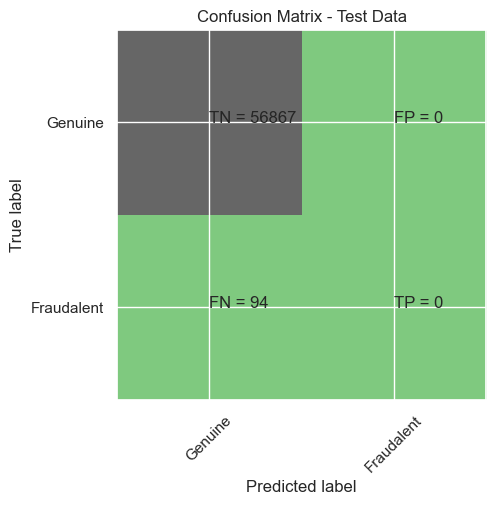

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56867
           1       0.00      0.00      0.00        94

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9990519829356929
Confusion Matrix


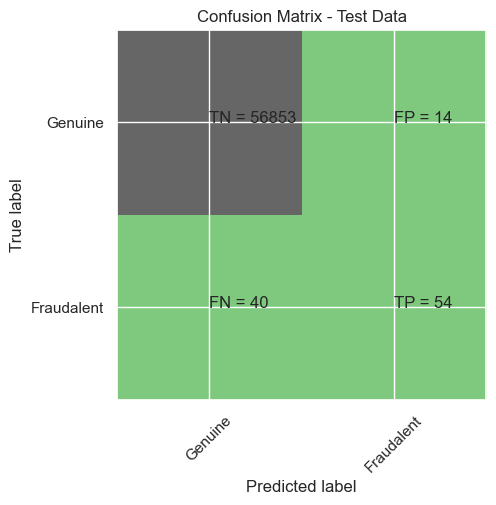

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56867
           1       0.79      0.57      0.67        94

    accuracy                           1.00     56961
   macro avg       0.90      0.79      0.83     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.5753613601576504
l2 threshold: 0.49927424915758184
ROC for the test dataset 57.5%


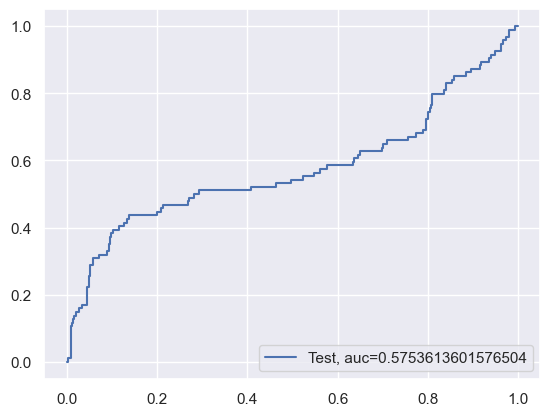

l1 roc_value: 0.8970934045808266
l1 threshold: 0.060182318963593176
ROC for the test dataset 89.7%


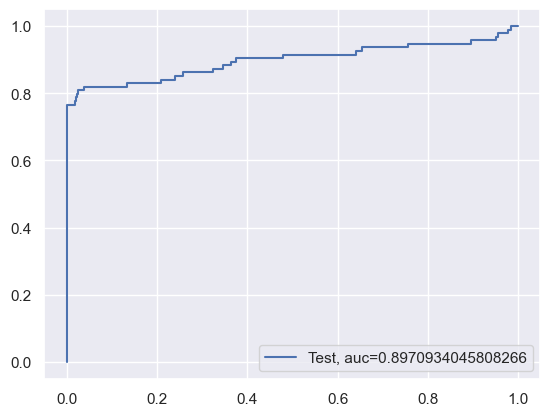

Time Taken by Model: --- 53.445472240448 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9992099857797441
Confusion Matrix


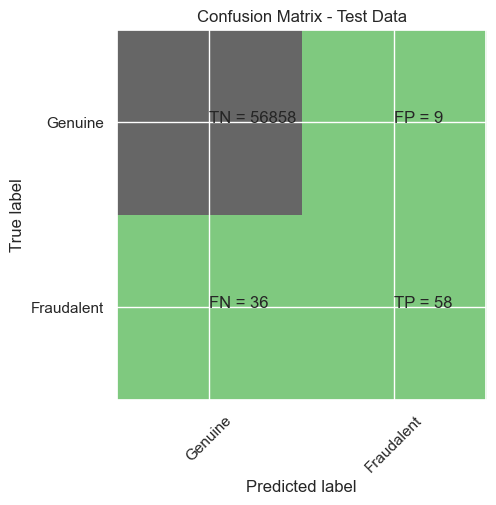

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56867
           1       0.87      0.62      0.72        94

    accuracy                           1.00     56961
   macro avg       0.93      0.81      0.86     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8720613121546393
KNN threshold: 0.2
ROC for the test dataset 87.2%


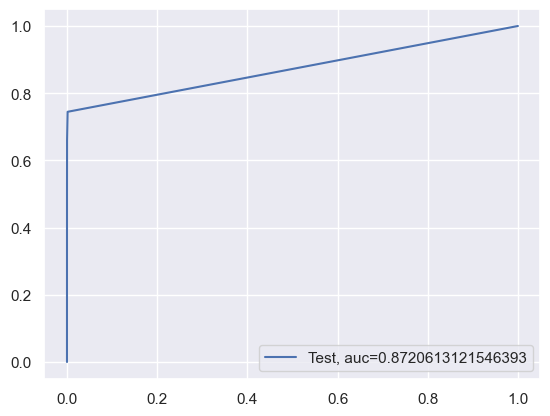

Time Taken by Model: --- 19.39524483680725 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9989993153210092
Confusion Matrix


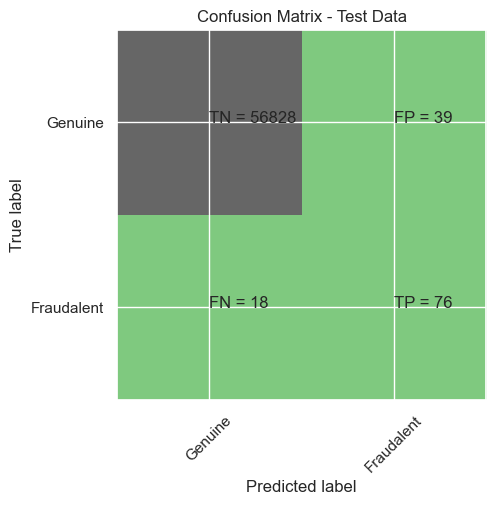

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56867
           1       0.66      0.81      0.73        94

    accuracy                           1.00     56961
   macro avg       0.83      0.90      0.86     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.903912413773235
Tree threshold: 1.0
ROC for the test dataset 90.4%


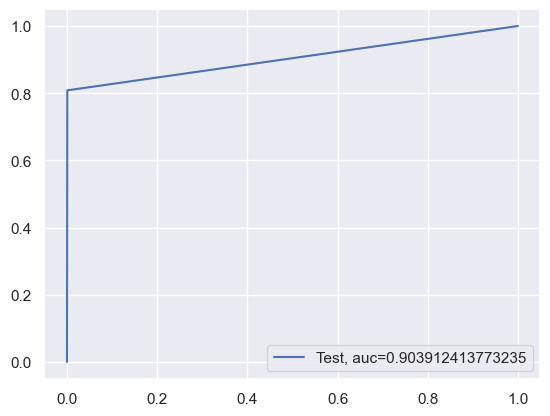

entropy score: 0.9991573181650603
Confusion Matrix


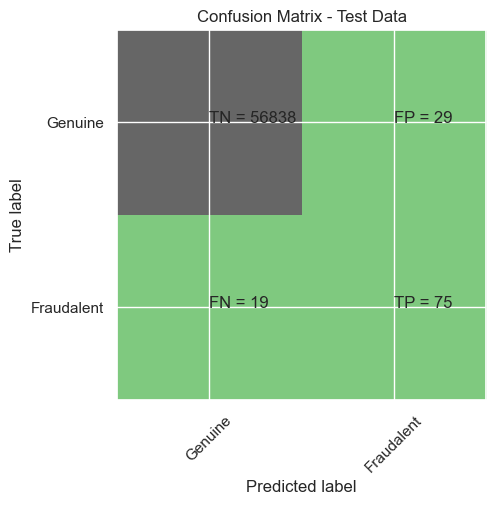

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56867
           1       0.72      0.80      0.76        94

    accuracy                           1.00     56961
   macro avg       0.86      0.90      0.88     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8986811892923726
Tree threshold: 1.0
ROC for the test dataset 89.9%


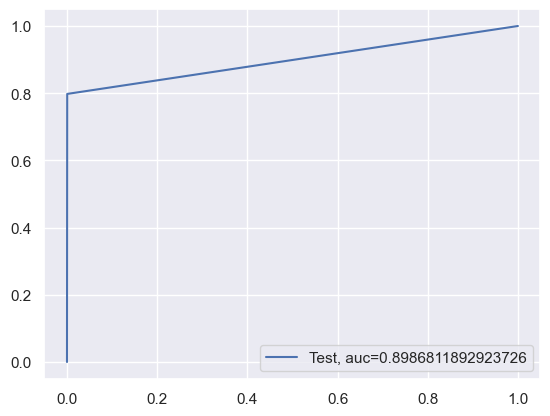

Time Taken by Model: --- 26.596930980682373 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995259914678464
Confusion Matrix


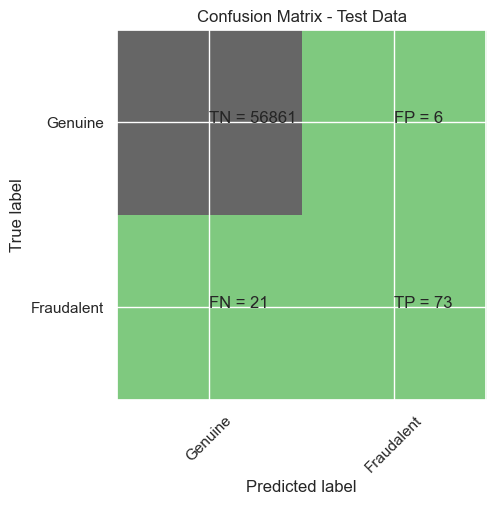

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56867
           1       0.92      0.78      0.84        94

    accuracy                           1.00     56961
   macro avg       0.96      0.89      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9613245575996848
Random Forest threshold: 0.01
ROC for the test dataset 96.1%


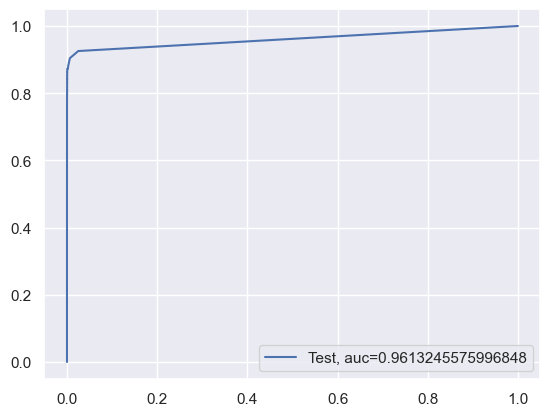

Time Taken by Model: --- 164.08052253723145 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9984375274310493
Confusion Matrix


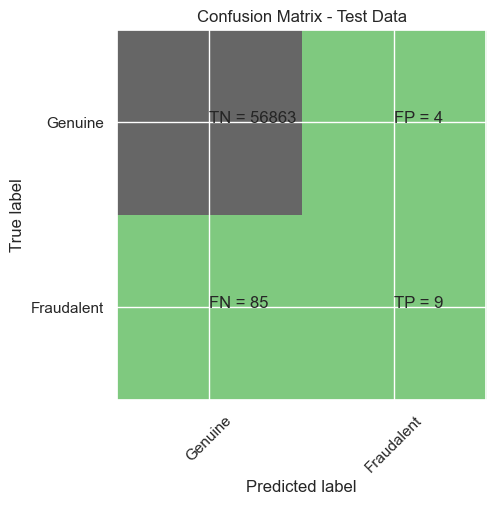

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56867
           1       0.69      0.10      0.17        94

    accuracy                           1.00     56961
   macro avg       0.85      0.55      0.58     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.5101154279732216
SVM threshold: 0.0017862848434023612
ROC for the test dataset 51.0%


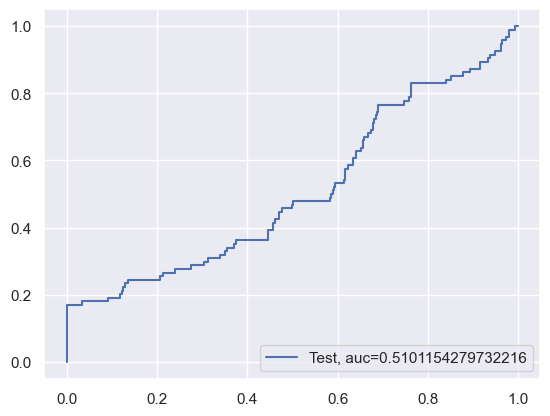

Time Taken by Model: --- 125.43384623527527 seconds ---


In [157]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [159]:
df_Results

Data_Imbalance_Handiling  \
0                Power Transformer   
1                Power Transformer   
2                Power Transformer   
3                Power Transformer   
4                Power Transformer   
5                Power Transformer   
6                Power Transformer   
7   RepeatedKFold Cross Validation   
8   RepeatedKFold Cross Validation   
9   RepeatedKFold Cross Validation   
10  RepeatedKFold Cross Validation   
11  RepeatedKFold Cross Validation   
12  RepeatedKFold Cross Validation   
13  RepeatedKFold Cross Validation   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998315   0.500000        inf  
1   Logistic Regression with L1 Regularisation  0.998841   0.963903   0.009276  
2                                          KNN  0.999298   0.900851   0.200000  
3                Tree Model with gini criteria  0.998806   0.859015   1.000000  
4             Tree Model with entropy criteria  0.999052   0.864337   1.000000  
5                                Random Forest  0.999350   0.940564   0.010000  
6                                          SVM  0.998560   0.891315   0.000674  
7   Logistic Regression with L2 Regularisation  0.998350   0.575361   0.499274  
8   Logistic Regression with L1 Regularisation  0.999052   0.897093   0.060182  
9                                          KNN  0.999210   0.872061   0.200000  
10               Tree Model with gini criteria  0.998999   0.903912   1.000000  
11            Tree Model with entropy criteria  0.999157   0.898681   1.000000  
12                               Random Forest  0.999526   0.961325   0.010000  
13                                         SVM  0.998438   0.510115   0.001786

Model Accuracy: 0.9993504441557529
Confusion Matrix


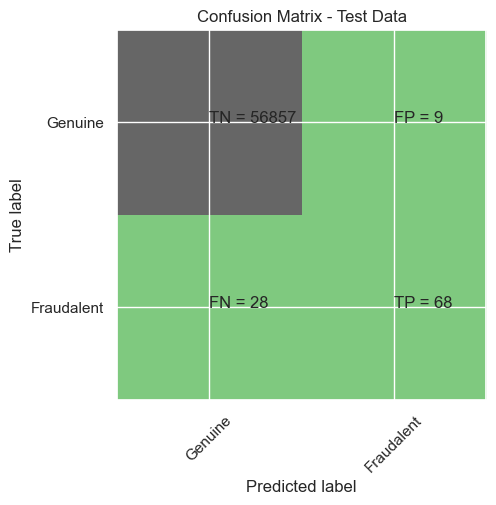

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.71      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value: 0.940564037972309
Random Forest threshold: 0.01
ROC for the test dataset 94.1%


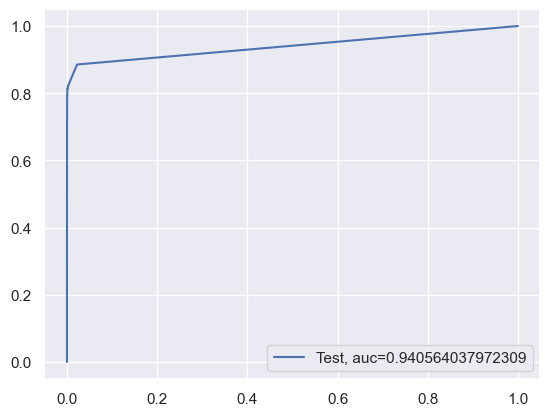

In [113]:
Result, model = buildAndRunRandomForestModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)

In [115]:
input = [[-1.3598071336738,
 -0.0727811733098497,
 2.53634673796914,
 1.37815522427443,
 -0.338320769942518,
 0.462387777762292,
 0.239598554061257,
 0.0986979012610507,
 0.363786969611213,
 0.0907941719789316,
 -0.551599533260813,
 -0.617800855762348,
 -0.991389847235408,
 -0.311169353699879,
 1.46817697209427,
 -0.470400525259478,
 0.207971241929242,
 0.0257905801985591,
 0.403992960255733,
 0.251412098239705,
 -0.018306777944153,
 0.277837575558899,
 -0.110473910188767,
 0.0669280749146731,
 0.128539358273528,
 -0.189114843888824,
 0.133558376740387,
 -0.0210530534538215,
 149.62,
 0.0]]

In [117]:
Result = model.predict(input)[0]

In [119]:
if (Result == 0):
    print('Customer is Geniune')
else:
    print('Customer is Fraud')

Customer is Geniune
